# Capstone Pre-trial: Sivagami


# PROBLEM STATEMENT
## • DOMAIN: Industrial safety. NLP based Chatbot.
## • CONTEXT: 
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the 
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.
## • DATA DESCRIPTION:
The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an 
occurrence of an accident.
## Columns description: 
### ‣ Data: timestamp or time/date information
### ‣ Countries: which country the accident occurred (anonymised)
### ‣ Local: the city where the manufacturing plant is located (anonymised)
### ‣ Industry sector: which sector the plant belongs to
### ‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
### ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
### ‣ Gender: if the person is male of female
### ‣ Employee or Third Party: if the injured person is an employee or a third party
### ‣ Critical Risk: some description of the risk involved in the accident
### ‣ Description: Detailed description of how the accident happened.
#### Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing,
#### Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database
## • PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.
## • PROJECT TASK: [ Duration: 6 weeks, Score: 100 points]
### 1. Milestone 1: [ Duration: 2 weeks, Score: 20 points]
#### ‣ Input: Interim report
#### ‣ Process:
#### ‣ Step 1: Import the data
#### ‣ Step 2: Data cleansing
#### ‣ Step 3: Data preprocessing
#### ‣ Step 4: Data preparation to be used for AIML model learning
#### ‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning
### 2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]
#### ‣ Input: Output of milestone 1
#### ‣ Process:
#### ‣ Step 1: NLP pre processing
#### ‣ Step 2: Design, train and test machine learning classifiers 
#### ‣ Step 3: Design, train and test Neural networks classifiers
#### ‣ Step 4: Design, train and test RNN or LSTM classifiers
#### ‣ Step 5: Choose the best performing model classifier and pickle it.
#### ‣ Output: Pickled model to be used for future prediction
#### ‣ Submission: Interim report 
### 3. Milestone 3: [ Duration: 2 weeks, Score: 60 points]
#### ‣ Input: Pickled model from milestone 2
#### ‣ Process: [ 15 points ]
#### ‣ Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ]
#### ‣ Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ]
#### ‣ Step 3: Design a clickable UI based chatbot interface [ 5 points ]
#### ‣ Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers.
#### ‣ Submission: Final report [ 45 points ]
#### ‣ Hints: 
#### ‣ Please refer to the blog to understand the basic designing and functioning of chatbots: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/
#### ‣ To make GUI as a desk app you can use TKINTER library. 
#### ‣ To make web service GUI you can use FLASK or DJANGO library

### Mount drive and change the Current Working Directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir ('/content/drive/MyDrive/Capstone Project/')

### Basic Imports; many of them may not be required for this project; however, we have just copy pasted for now. We'll remove the unnecessary imports later.

In [ ]:
#--------------------------------------BASIC-IMPORTS-----------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid',font_scale=1.4) 
#style to ensure a darkgrid background & font_scale to ensure a comfortable font size
%matplotlib inline
#--------------------------------------TENSORFLOW-IMPORTS------------------------------------------------------------------
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import ZeroPadding2D,Flatten,BatchNormalization,MaxPooling2D,Dropout, Convolution2D, Dense, Conv2D, Activation, BatchNormalization,UpSampling2D, Input, Concatenate,Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.mobilenet import preprocess_input, MobileNet
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
import tensorflow
#--------------------------------------SKLEARN-IMPORTS---------------------------------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
#--------------------------------------SUPERVISED LEARNING-IMPORTS---------------------------------------------------------------------
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score,cross_validate
#--------------------------------------MISC--------------------------------------------------------------------------------
import datetime
import time
from tqdm import tqdm
from copy import deepcopy
import cv2
import skimage.io as io
import h5py
import random
random.seed(0)
#--------------------------------------------------------------------------------------------------------------------------

### Load the Dataset and conduct some basic checks such as Shape, Dtypes, Null Values, Duplication etc.

In [ ]:
df1=pd.read_csv('dataset1.csv')

### Create a DataFrame Tracker to keep track of the various DataFrames created.

In [ ]:
df_tracker={'df_name': 'df1',
            '# of Records': df1.shape[0],
            '# of Columns': df1.shape[1],
            'Remarks': "Original DataFrame"}
df_tracker=pd.DataFrame(data=df_tracker,index=[0])
df_tracker

,df_name,# of Records,# of Columns,Remarks
0,df1,425,11,Original DataFrame


In [ ]:
df1

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


### As can be seen, we have only 425 Records and 11 Features.
### We'll get to the Features in a bit; however, at first glance having only 425 Records seems like there isn't much data for us to work with. These are only initial views; as the Project proceeds we'll know whether this is sufficient or not.

### Coming to the Features, we have 11 Features; however, only 10 of these Features have been described in the "Problem Statement":
#### 1 Data: timestamp or time/date information
#### 2 Countries: which country the accident occurred (anonymised)
#### 3 Local: the city where the manufacturing plant is located (anonymised)
#### 4 Industry sector: which sector the plant belongs to
#### 5 Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
#### 6 Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
#### 7 Gender: if the person is male of female
#### 8 Employee or Third Party: if the injured person is an employee or a third party
#### 9 Critical Risk: some description of the risk involved in the accident
#### 10 Description: Detailed description of how the accident happened.

### The 11th Feature or rather the 1st Feature named "Unamed" seems to be the indices of the Dataset. Assuming this to be the indices, although there are only 425 records, the indices go all the way up to 438; i.e, there are an excess of 438 - 425 = 13 Records as per the Original Indices when compared to the number of records. Wonder why these 13 records are missing. Let's explore this a bit and check if there is anything of value here.

In [ ]:
438-425

13

In [ ]:
df1.style

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."
5,5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,"During the unloading operation of the ustulado Bag there was a need to unclog the discharge mouth of the silo truck. In performing this procedure, there was a maneuver of unhooking the hose without the total depressurisation of the mouth, projecting ustulado powder in the collaborator caused irritation in the eyes."
6,6,2016-01-16 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),"The collaborator reports that he was on street 09 holding in his left hand the volumetric balloon, when he slipped and when placing his hand on the ground the volumetric balloon ended up breaking caused a small wound in his left hand."
7,7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic technician José of the Tecnomin verified the transmission belts of the HM-100 pump at the Acid plant, he proceeded to turn the pulley manually; unexpectedly at that instant the electrician supervisor Miguel of the EKA Mining grabs the transmission belts to verify their tension, at which point the finger traps."
8,8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),

### A quick Visual Inspection reveals a jump from 41 to 54 in the "Unnamed" column: 

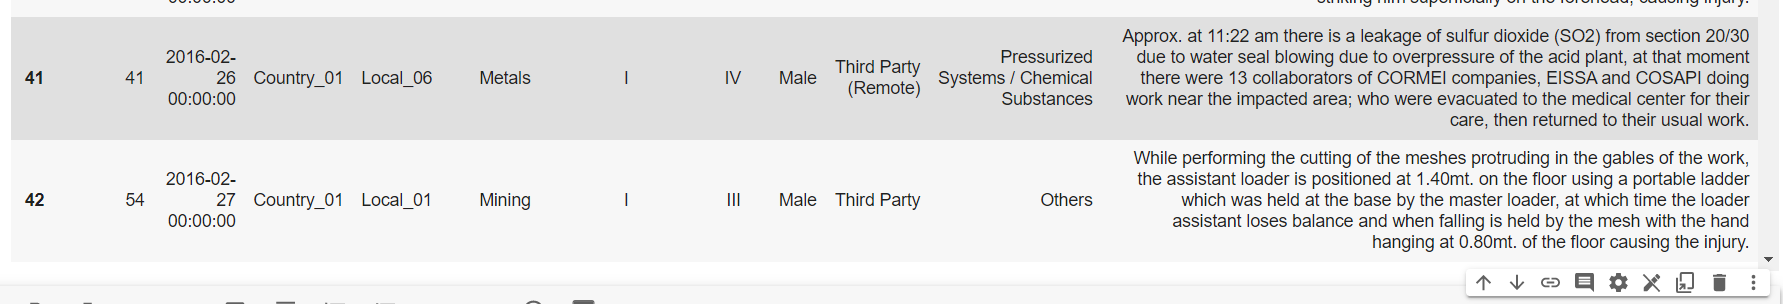

### No idea why this jump is there. Possibly the entries from 42 to 53 were deleted for some reason. Either way, we have no way of knowing that.
### Since at this stage there seems to be no point in holding on to the "Unnamed" column, we shall drop it.

In [ ]:
df2=df1.drop(columns=['Unnamed: 0']).copy()
df2

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [ ]:
df_tracker=df_tracker.append({'df_name': 'df2',
            '# of Records': df2.shape[0],
            '# of Columns': df2.shape[1],
            'Remarks': "dropped Unnamed Attribute from df1"},ignore_index=True)
df_tracker

,df_name,# of Records,# of Columns,Remarks
0,df1,425,11,Original DataFrame
1,df2,425,10,dropped Unnamed Attribute from df1


### Dtypes:

In [ ]:
df2.dtypes

Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

### All objects; no surprises here though we need to remember to convert all these features to numbers.

### Null Value Check:

In [ ]:
def null_chk(x): 
    """Pass a DataFrame as an argument to check for null values. If any null values exist, they show up as red marks"""
    print('-------------------------------------------------------------------------------------------------------------------')
    print('Summary Statistics showing Attribute Names on the left and the Number of Null Values on the right:\n')
    nn=x.isnull().sum()
    print(nn)
    print('-------------------------------------------------------------------------------------------------------------------')
    print('Records with null values:\n')
    print(x[x.isnull().any(axis=1)])
    print('-------------------------------------------------------------------------------------------------------------------')
    print('\nAny existing red marks visually show null values:')
    colours = ['#000000', '#ff0000'] 
    sns.heatmap(x.isnull(), cmap=sns.color_palette(colours),center=1)

-------------------------------------------------------------------------------------------------------------------
Summary Statistics showing Attribute Names on the left and the Number of Null Values on the right:

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64
-------------------------------------------------------------------------------------------------------------------
Records with null values:

Empty DataFrame
Columns: [Data, Countries, Local, Industry Sector, Accident Level, Potential Accident Level, Genre, Employee or Third Party, Critical Risk, Description]
Index: []
-------------------------------------------------------------------------------------------------------------------

Any existing red marks visually 

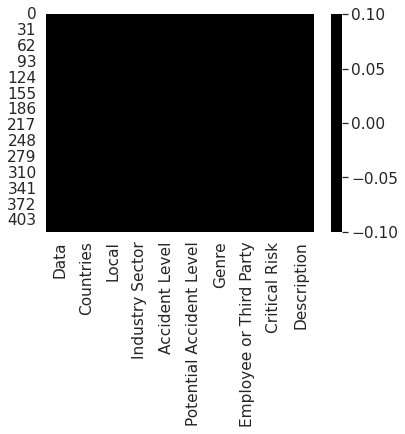

In [ ]:
null_chk(df2)

### No Null Values... That's Great!

### Duplicated Records check.

In [ ]:
def dup_chk(x,prnt=False):
    """Send a DataFrame as the argument and this function returns whether Duplicate Records exist or not.
    If Duplicated Records exist, this function displays all Duplicate Records """
    if x.drop_duplicates().shape==x.shape:
        print('There are no Duplicated Records!\n')
    else:
        print('-----------------------------------------------------------------------------')
        print('Duplicated Records exist!!!')
        print('The Total number of records that have duplicates are %i' % (x.shape[0]-x.drop_duplicates().shape[0]))
        print("The total number of Duplicated Records are: %i" % (x[x.duplicated(keep='last')].shape[0]))
        print('-----------------------------------------------------------------------------')
        
        if (prnt):
            print('The Duplicated Records are:\n',x[x.duplicated(keep=False)])

In [ ]:
dup_chk(df2)

-----------------------------------------------------------------------------
Duplicated Records exist!!!
The Total number of records that have duplicates are 7
The total number of Duplicated Records are: 7
-----------------------------------------------------------------------------


### Oh Oh!!! Duplicated Records exist.... Let's go ahead and check what these Duplicated Records are:

In [ ]:
dup_chk(df2,True)

-----------------------------------------------------------------------------
Duplicated Records exist!!!
The Total number of records that have duplicates are 7
The total number of Duplicated Records are: 7
-----------------------------------------------------------------------------
The Duplicated Records are:
                     Data  ...                                        Description
76   2016-04-01 00:00:00  ...  In circumstances that two workers of the Abrat...
77   2016-04-01 00:00:00  ...  In circumstances that two workers of the Abrat...
261  2016-12-01 00:00:00  ...  During the activity of chuteo of ore in hopper...
262  2016-12-01 00:00:00  ...  During the activity of chuteo of ore in hopper...
302  2017-01-21 00:00:00  ...  Employees engaged in the removal of material f...
303  2017-01-21 00:00:00  ...  Employees engaged in the removal of material f...
344  2017-03-02 00:00:00  ...  On 02/03/17 during the soil sampling in the re...
345  2017-03-02 00:00:00  ...  On 02/0

### Let's check these in more detail:

In [ ]:
dup_list=[76,77,261,262,302,303,344,345,346,354,355,396,397]
df2.iloc[dup_list].style

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
76,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,"In circumstances that two workers of the Abratech company were doing putty work inside the conditioning tank (5 meters deep and covered by platforms) of metal gratings - grating- in the upper part), two other employees of the HyT company carried out maneuvers transfer of a pump with the help of a manual tick - which worked hooked to a beam H, dragging the pump on the metal gratings (grating), suddenly the pump is hooked with a metal grate (grating) and when trying to release it, the metal grid (grating - 13.0 Kg. (60 cm x 92 cm)) falls inside the tank, hits a diagonal channel inside the tank and then impacts the right arm of one of the workers and rubs the helmet of the second worker that he was crouching. The area where the bomb was being moved was marked with tape and did not have a lookout."
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,"In circumstances that two workers of the Abratech company were doing putty work inside the conditioning tank (5 meters deep and covered by platforms) of metal gratings - grating- in the upper part), two other employees of the HyT company carried out maneuvers transfer of a pump with the help of a manual tick - which worked hooked to a beam H, dragging the pump on the metal gratings (grating), suddenly the pump is hooked with a metal grate (grating) and when trying to release it, the metal grid (grating - 13.0 Kg. (60 cm x 92 cm)) falls inside the tank, hits a diagonal channel inside the tank and then impacts the right arm of one of the workers and rubs the helmet of the second worker that he was crouching. The area where the bomb was being moved was marked with tape and did not have a lookout."
261,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
302,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,"Employees engaged in the removal of material from the excavation of the well 2 of level 265, using shovel and placing it in the bucket. During the day some of this material fell into the pipes of the employees' boots and the friction between the boot and the calf caused a superficial injury to the legs."
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,"Employees engaged in the removal of material from the excavation of the well 2 of level 265, using shovel and placing it in the bucket. During the day some of this material fell into the pipes of the employees' boots and the friction between the boot and the calf caused a superficial injury to the legs."
344,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand ove

### No idea why these records have been duplicated. Let's manually analyse a few and check it out.

### Indices 76 & 77: Refers to 2 people being injured in the incident.
### Indices 261 & 262: Only one person seems to have been affected by this indicent; so we have no clue why this entry has been duplicated.
### All the other duplicated records seem to have duplications equal to the number of people involved in the accidents. For instance, if there are 2 people involved, we have 2 identical records and if there are 3 people involved (as in the indices 344, 345 and 346) we have 3 identical records.
### Thus, at this stage it is safe to assume that Identical Records refer to accidents involving more than 1 person where the other Attributes of all people involved are also Identical. for instance, in Indices 76 & 77 we have both people as Third Party (Remote) Males from Country_01, Local_01 in the Mining sector.

### In any case, let us drop duplicates and save it as another DataFrame: df3.
### we'll decide later whether df2 is better or df3

In [ ]:
df3=df2.drop_duplicates()
df3

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


### Let's check whether they have been successfully dropped:

In [ ]:
dup_chk(df3)

There are no Duplicated Records!



### Great! That's done successfully...

In [ ]:
df_tracker=df_tracker.append({'df_name': 'df3',
            '# of Records': df3.shape[0],
            '# of Columns': df3.shape[1],
            'Remarks': "dropped Duplicated Records from df2"},ignore_index=True)
df_tracker

,df_name,# of Records,# of Columns,Remarks
0,df1,425,11,Original DataFrame
1,df2,425,10,dropped Unnamed Attribute from df1
2,df3,418,10,dropped Duplicated Records from df2


### Next we'll check for Duplications in the description column in df2:

In [ ]:
def dup_att_viewer(df,col,op='vc'):
    """ Send a DataFrame and a Column within the DataFrame to see all the Records with Identical Values of the Attribute. 
    In case of no repition in Attribute Values, An empty value is returned.
    
    Parameters
    ------------
    df: DataFrame
    
    col: string: 
    The name of the column within which you want to check for repition of values.
    
    op: string: Default=vc: Acceptable Values - "vc" , "df"
     "vc" returns the value counts of the repeated values within the Attribute.
     "df" returns a DataFrame
    
    Returns
    --------
    op="vc" - Value counts of the repeated values within the Attribute.
    op="df" - DataFrame with all Identical Values within the specified Attribute
    
    """
    
    import numpy as np
    import pandas as pd
    
    
    rep=df[col].value_counts()[df[col].value_counts()>1].index #get the records which appear more than once in the passed column
    rep_df=pd.DataFrame()
    
    if rep.size==0:
        print('No duplications in Attribute: %s' % (col))
    
    else:
        for i in rep:
            rep_df=rep_df.append(df[df[col]==i],ignore_index=False)
    
    vc=rep_df[col].value_counts()
    
    print('%s has a total of %i repeated values' % (col,vc.shape[0]))
    
    if op=='vc':
        return(vc)
    elif op=='df':
        return(rep_df) 
    else:
        print("ERROR in op parameter. Please enter op values as vc or df.\n %s NOT ALLOWED" %op)

In [ ]:
dup_att_viewer(df2,'Description','df').style  

Description has a total of 12 repeated values


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
261,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
263,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,"During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing out to release the load, a mud flow suddenly appears with the presence of rock fragments; the personnel that was in the direction of the flow was covered with mud."
344,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,"On 02/03/17 during the soil sampling in the region of Sta. the employees Rafael and Danillo da Silva were attacked by a bee test. They rushed away from the place, but the employee Rafael took 4 bites, one on the chin, one on the chest, one on the neck and one on the hand over the glove. The employee took 4 bites, one in his hand over his glove and the other in the head, and the employee Danillo took 2 bites in the left arm over his uniform. At first no one sketched allergy, just swelling at the sting site. The activity was stopped to evaluate the site, after verifying that the test had remained in the line, they left the site."
37,2016-02-24 00:00:00,Country_02,Local_07,Mining,I,V,Male,Employee,Others,When starting the activity of removing a coil of electric cables in the warehouse with the help of forklift truck the operator did not notice that there was a beehive in it. Due to the movement of the coil the bees were excited. Realizing the fact the operator turned off the equipment and left the area. People pa

### This seems to follow the very same pattern. Thus, we can conclude that the decriptions are all the same for all personnel involved in the accident. 
### The only descrepancy that seems to be there is in Indices 166 and 167; the potential accident level at index 166 is V and index 167 is IV. This doesn't make sense, since The Potential Accident Level by definition needs to have the same value if the description is the same.

### Time to check the value_counts() for all features other than "Data" and "Description"
### We'll proceed by analysing df2

### Countries:

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [ ]:
data = df2['Countries'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df2.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker_color=px.colors.qualitative.Dark24,
               
               )
# Create layout
layout = dict(title = 'Distribution Of {} Sample'.format(df2.shape[0]),
              xaxis = dict(title = 'Countries',color = '#000000'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer="colab")
iplot(fig)

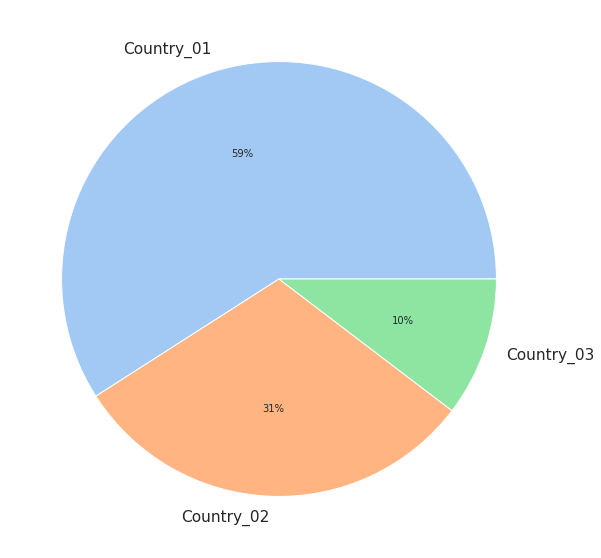

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.figure(figsize=[10,10])
plt.pie(pd.DataFrame(df2['Countries'].value_counts().reset_index())['Countries'], labels = pd.DataFrame(df2['Countries'].value_counts().reset_index())['index'], colors = colors, autopct='%.0f%%')
plt.show()

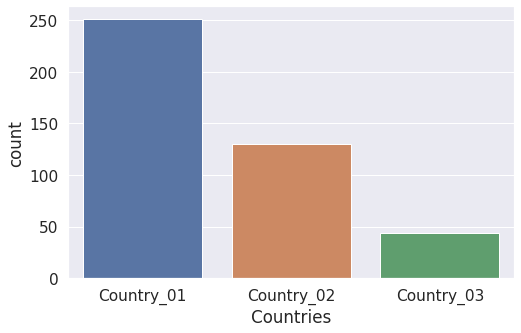

-----------------------------------------------------------------


In [ ]:
plt.figure(figsize=[8,5])
sns.countplot(data=df2,x='Countries')
plt.show()
plt.close()
print('-----------------------------------------------------------------')

### Country_01 has the maximum number of recorded incidents.
### Country_02 seems to have half the number of recorded incidents as Country_01; and
### Country_03 has less than half the number of recorded incidents as Country_02

### Let's check their Normalized Value Counts:

In [ ]:
np.round(df2['Countries'].value_counts(normalize=True)*100)

Country_01    59.0
Country_02    31.0
Country_03    10.0
Name: Countries, dtype: float64

### 59% of the incidents from Country_01; 31% from Country_02 and hardly 10% from Country_03
### Assuming that there is no bias in data collection across the 3 countries, this means that there is a strong possibility that Country_01 has the maximum possibility for accidents

In [ ]:
df2.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

### Local: refers to the city in which the plant is located

In [ ]:
data = df2['Local'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df2.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker_color=px.colors.qualitative.Dark24,
               
               )
# Create layout
layout = dict(title = 'Distribution Of {} Sample'.format(df2.shape[0]),
              xaxis = dict(title = 'Local',color = '#000000'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer="colab")
iplot(fig)

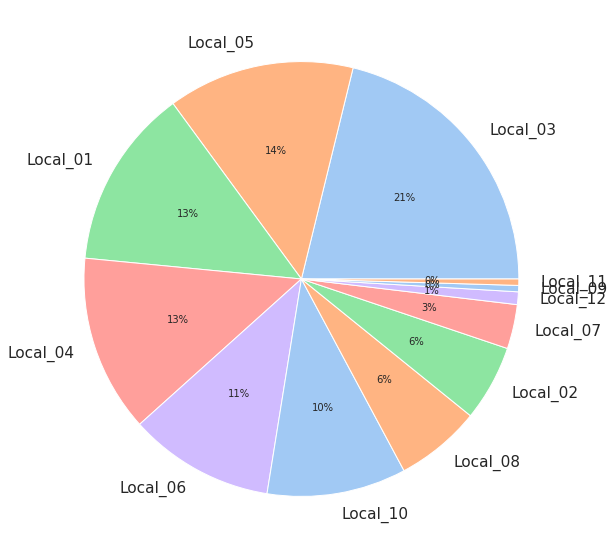

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.figure(figsize=[10,10])
plt.pie(pd.DataFrame(df2['Local'].value_counts().reset_index())['Local'], labels = pd.DataFrame(df2['Local'].value_counts().reset_index())['index'], colors = colors, autopct='%.0f%%')
plt.show()

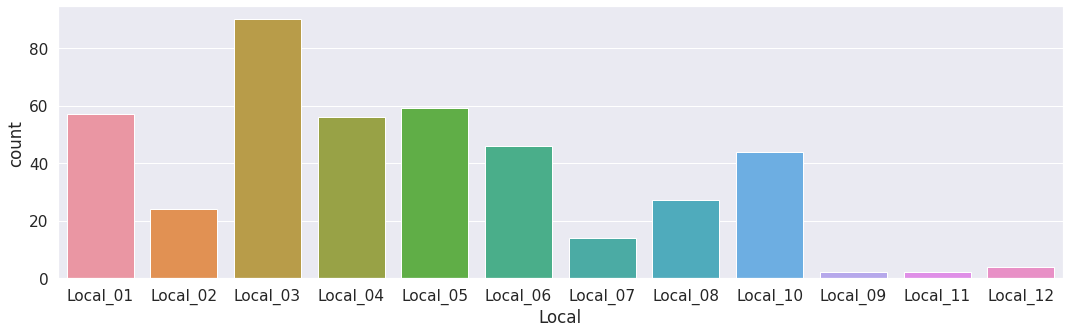

-----------------------------------------------------------------


In [ ]:
plt.figure(figsize=[18,5])
sns.countplot(data=df2,x='Local')
plt.show()
plt.close()
print('-----------------------------------------------------------------')

### Local_03 has the maximum number of recorded incidents; almost 90
### Local_01, _04 and _05 have about 60 incidents each closely followed by Local_06 and 10 with a little more than 40 incidents each
### Local_02 and _08 have a little more than 20 incidents each folowed closely by Local_07 with about 15 incidents
### Local_09, _11 and _12 have very few recorded incidents


### Let's check their Normalized Value Counts:

In [ ]:
np.round(df2['Local'].value_counts(normalize=True)*100)

Local_03    21.0
Local_05    14.0
Local_01    13.0
Local_04    13.0
Local_06    11.0
Local_10    10.0
Local_08     6.0
Local_02     6.0
Local_07     3.0
Local_12     1.0
Local_09     0.0
Local_11     0.0
Name: Local, dtype: float64

### _03,_05,_01,_04,_06 and _10 are the plants in these cities with high number of incidents.
### We strongly recommend that these cities enforce stricter safety measures. 

### Industry Sector:

In [ ]:
data = df2['Industry Sector'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df2.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker_color=px.colors.qualitative.Dark24,
               
               )
# Create layout
layout = dict(title = 'Distribution Of {} Sample'.format(df2.shape[0]),
              xaxis = dict(title = 'Industry Sector',color = '#000000'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer="colab")
iplot(fig)

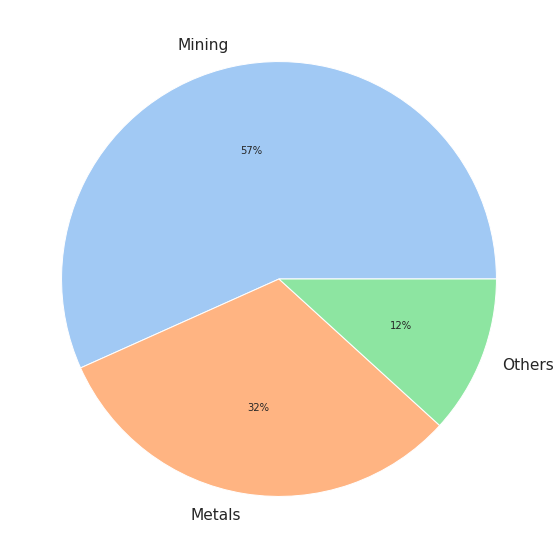

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
cat='Industry Sector'
#create pie chart
plt.figure(figsize=[10,10])
plt.pie(pd.DataFrame(df2[cat].value_counts().reset_index())[cat], labels = pd.DataFrame(df2[cat].value_counts().reset_index())['index'], colors = colors, autopct='%.0f%%')
plt.show()

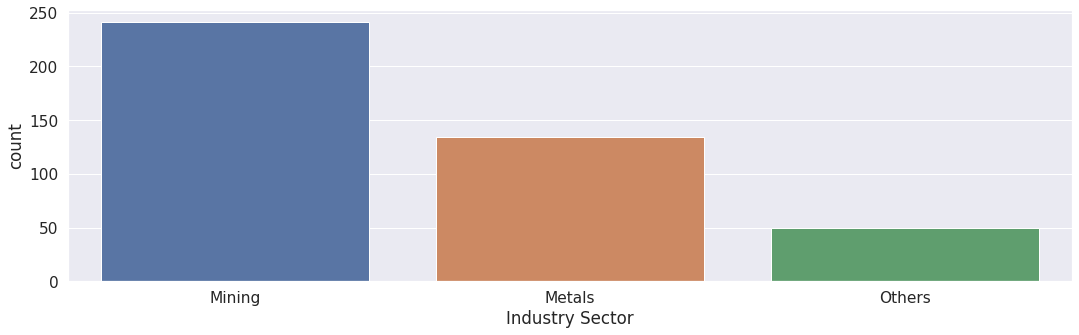

-----------------------------------------------------------------


In [ ]:
plt.figure(figsize=[18,5])
sns.countplot(data=df2,x=df2.columns[3])
plt.show()
plt.close()
print('-----------------------------------------------------------------')

### Clearly, most of the incidents have happened at Mining sites. We could therefore safely assume that the countries and cities with the maximum number of incidents are from the Mining Sector. We can later check this assumption. Perhaps Country_01 has Mining Plants, Country_02 has Metal Plants and Country_03 has other plants. We'll confirm/reject this thought also later.

### Let's check their Normalized Value Counts:

In [ ]:
np.round(df2[df2.columns[3]].value_counts(normalize=True)*100)

Mining    57.0
Metals    32.0
Others    12.0
Name: Industry Sector, dtype: float64

### 57%, 32% and 12% respectively.

### Accident Level:

In [ ]:
data = df2['Accident Level'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df2.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker_color=px.colors.qualitative.Dark24,
               
               )
# Create layout
layout = dict(title = 'Distribution Of {} Sample'.format(df2.shape[0]),
              xaxis = dict(title = 'Accident Level',color = '#000000'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer="colab")
iplot(fig)

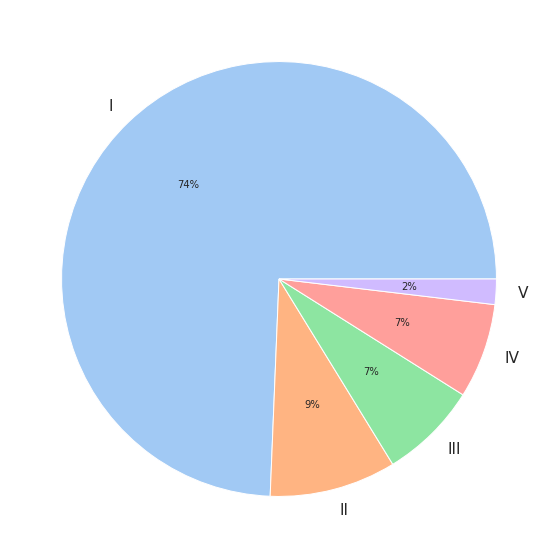

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
cat='Accident Level'
#create pie chart
plt.figure(figsize=[10,10])
plt.pie(pd.DataFrame(df2[cat].value_counts().reset_index())[cat], labels = pd.DataFrame(df2[cat].value_counts().reset_index())['index'], colors = colors, autopct='%.0f%%')
plt.show()

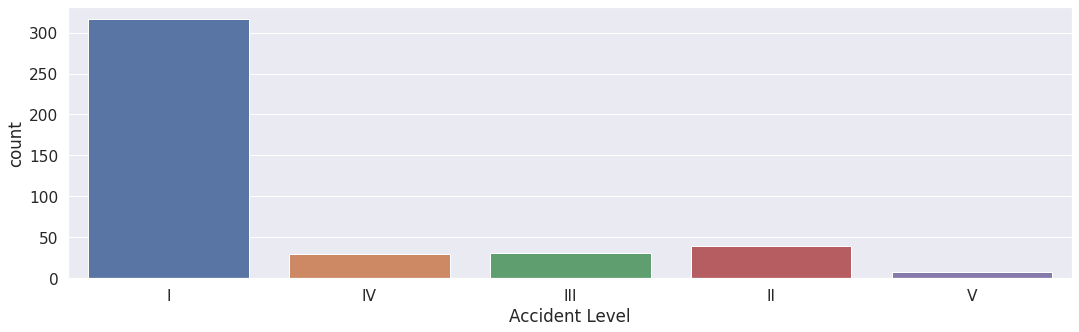

-----------------------------------------------------------------


In [ ]:
plt.figure(figsize=[18,5])
sns.countplot(data=df2,x=df2.columns[4])
plt.show()
plt.close()
print('-----------------------------------------------------------------')

### Good to see that most of the accidents are Minor Accidents. only few of the accidents are of level 2, 3 and 4 and very few accidents of level 5.
### Let's check both value_counts() this time.

In [ ]:
df2[df2.columns[4]].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

In [ ]:
np.round(df2[df2.columns[4]].value_counts(normalize=True)*100)

I      74.0
II      9.0
III     7.0
IV      7.0
V       2.0
Name: Accident Level, dtype: float64

### Just 8 incidents at Level 5 and 74% of the accidents at Level 1; that's good news.

### Potential Accident Level:

In [ ]:
data = df2['Potential Accident Level'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df2.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker_color=px.colors.qualitative.Dark24,
               
               )
# Create layout
layout = dict(title = 'Distribution Of {} Sample'.format(df2.shape[0]),
              xaxis = dict(title = 'Potential Accident Level',color = '#000000'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer="colab")
iplot(fig)

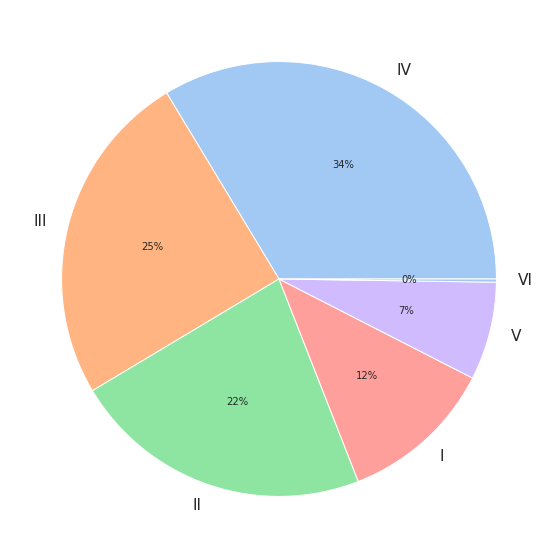

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
cat='Potential Accident Level'
#create pie chart
plt.figure(figsize=[10,10])
plt.pie(pd.DataFrame(df2[cat].value_counts().reset_index())[cat], labels = pd.DataFrame(df2[cat].value_counts().reset_index())['index'], colors = colors, autopct='%.0f%%')
plt.show()

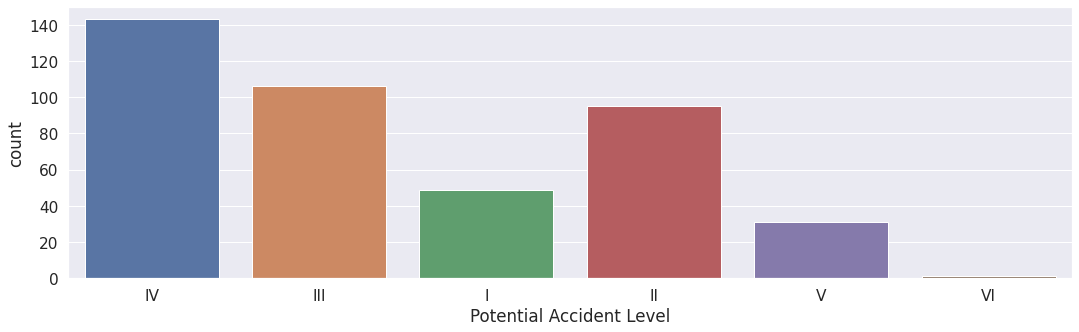

-----------------------------------------------------------------


In [ ]:
plt.figure(figsize=[18,5])
sns.countplot(data=df2,x=df2.columns[5])
plt.show()
plt.close()
print('-----------------------------------------------------------------')

### Most of the Potential Accident Levels are at Levels 4 and 3, closely followed by Level 2. Only 1 incident with a Potential Accident Level 6; we'll take a look at this in a bit. This is also good news. This basically means that most of the recorded accidents could have been Major Accidents; however, either due to luck or appropriate safety measures, they were largely restricted to Levels 1 and 2.

### Let's check their Normalized Value Counts:

In [ ]:
np.round(df2[df2.columns[5]].value_counts(normalize=True)*100)

IV     34.0
III    25.0
II     22.0
I      12.0
V       7.0
VI      0.0
Name: Potential Accident Level, dtype: float64

In [ ]:
df2[df2.columns[5]].value_counts()

IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64

### As mentioned, only one accident which had a potential level of 6. Let's check this record:

In [ ]:
df2[df2[df2.columns[5]]=='VI'].style

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
307,2017-01-25 00:00:00,Country_01,Local_03,Mining,V,VI,Male,Third Party,remains of choco,"During the process of loading drills in the Carmen pit of level 3450, the operator positions the basket of the anfo loader 186 equipment at a height of 3m from the floor to carry out the loading of the production drills; At this moment, a stone slab of 1.4x0.7x0.2 m is detached from the front of the pit, which is tilted and lodged inside the basket, trapping the right leg of the collaborator."


### Ouch! That sure sounds painful. Wonder whether the person lost his leg.

### Genre: Gender

In [ ]:
data = df2['Genre'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df2.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker_color=px.colors.qualitative.Dark24,
               
               )
# Create layout
layout = dict(title = 'Distribution Of {} Sample'.format(df2.shape[0]),
              xaxis = dict(title = 'Genre',color = '#000000'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer="colab")
iplot(fig)

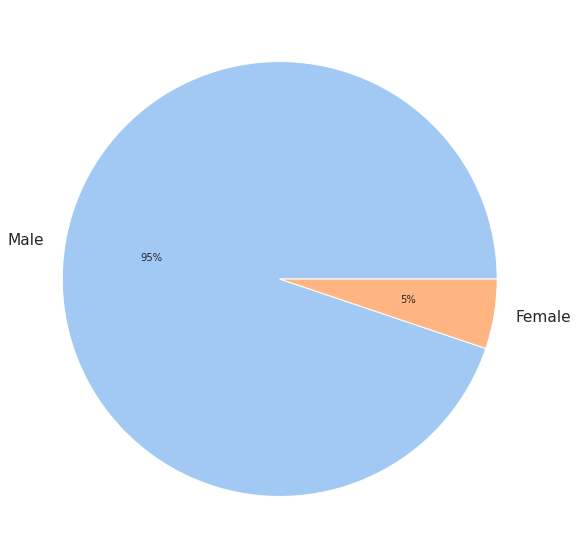

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
cat='Genre'
#create pie chart
plt.figure(figsize=[10,10])
plt.pie(pd.DataFrame(df2[cat].value_counts().reset_index())[cat], labels = pd.DataFrame(df2[cat].value_counts().reset_index())['index'], colors = colors, autopct='%.0f%%')
plt.show()

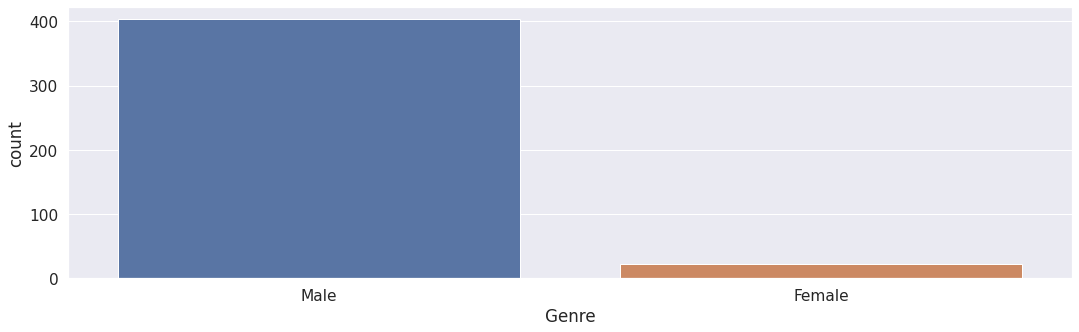

-----------------------------------------------------------------


In [ ]:
plt.figure(figsize=[18,5])
sns.countplot(data=df2,x=df2.columns[6])
plt.show()
plt.close()
print('-----------------------------------------------------------------')

### Largely men and a few women. Not surprising; possibly because the nature of the jobs such as Mining, Metal -work etc. are dominated more by Men in these countries.

### Let's check their Normalized Value Counts:

In [ ]:
np.round(df2[df2.columns[6]].value_counts(normalize=True)*100)

Male      95.0
Female     5.0
Name: Genre, dtype: float64

In [ ]:
df2[df2.columns[6]].value_counts()

Male      403
Female     22
Name: Genre, dtype: int64

### Only 5% of women. Let's check a few of these entries.

In [ ]:
df2[df2[df2.columns[6]]=='Female'].style

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
17,2016-02-07 00:00:00,Country_01,Local_06,Metals,I,II,Female,Third Party,Others,"Due to the overheating of 2 bars in row 5 of cell 7 a spark is produced, which is projected and manages to reach the Chief of guard who was in the corridor, producing a first degree burn in the neck."
38,2016-02-24 00:00:00,Country_02,Local_07,Mining,I,V,Female,Third Party,Others,When starting the activity of removing a coil of electric cables in the warehouse with the help of forklift truck the operator did not notice that there was a beehive in it. Due to the movement of the coil the bees were excited. Realizing the fact the operator turned off the equipment and left the area. People passing by were stung.
100,2016-04-26 00:00:00,Country_02,Local_05,Metals,I,II,Female,Third Party,Cut,The injured woman performed cleaning and when cleaning the sink of the collection room pierced the finger with a fragment of glass.
107,2016-05-02 00:00:00,Country_02,Local_05,Metals,I,IV,Female,Third Party (Remote),Chemical substances,The employee reports that climbing the access ladder to the operating room of the Ustulation was surprised by the projection of sulfuric acid.
111,2016-05-04 00:00:00,Country_02,Local_05,Metals,I,III,Female,Third Party (Remote),Chemical substances,"When conducting inspection to evaluate activity to be carried out in the pump house of the Ustulation steam station, it was hit by sulfuric acid spills from a line located above the pump house of the thermal recovery boiler."
173,2016-07-15 00:00:00,Country_02,Local_05,Metals,I,II,Female,Employee,Chemical substances,"when handling a sample in the laboratory, the sleeve of the employee's coat had contact with nitric acid, absorbing a small amount that came to reach the left forearm, causing a 1st degree burn."
177,2016-07-21 00:00:00,Country_02,Local_12,Others,I,II,Female,Employee,Traffic,"At the Eusébio bridge, there was a sudden braking in which several cars had to brake quickly. The collaborator's car failed to stop in time and collided with the rear of the car ahead. They were about 40km / hour."
183,2016-08-01 00:00:00,Country_02,Local_05,Metals,II,III,Female,Third Party,Manual Tools,The employee of partner company GR reports that she was cutting watermelon when she injured her 2nd chirodactilo of the left hand with the knife.
188,2016-08-11 00:00:00,Country_02,Local_12,Others,I,IV,Female,Employee,Others,"On leaving the Company the employee stumbled onto the exit ladder of the building and fell 3 steps, causing twisting of the ankle and grating on the cinnamon"
201,2016-08-30 00:00:00,Country_02,Local_08,Metals,II,II,Female,Third Party (Remote),Others,"During the execution of the area cleaning activity using a hoe, the employee hit against a fixed metal structure in the area, coming to reach the abdomen on the left."


### As can be seen, there is only 1 Female Employee in the Mining Sector - index 421. At least only one that has been involved in an accident. Can't seem to understand the description though; it's rather confusing. It talks about a bra hook getting stuck with the shoe? 
### All the other women involved in the Mining Sector are "Third Party". 
### Also, most of the descriptions suggest that the accidents related to Females are predominantly about them falling down.

### Employee or Third Party:

In [ ]:
data = df2['Employee or Third Party'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df2.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker_color=px.colors.qualitative.Dark24,
               
               )
# Create layout
layout = dict(title = 'Distribution Of {} Sample'.format(df2.shape[0]),
              xaxis = dict(title = 'Employee or Third Party',color = '#000000'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer="colab")
iplot(fig)

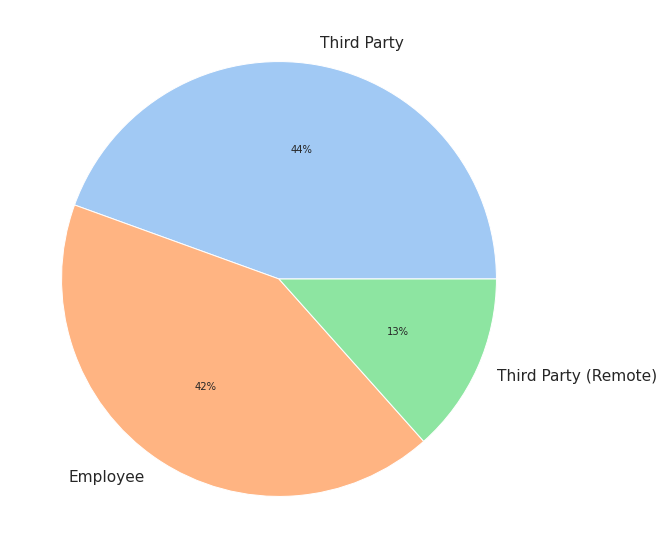

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
cat='Employee or Third Party'
#create pie chart
plt.figure(figsize=[10,10])
plt.pie(pd.DataFrame(df2[cat].value_counts().reset_index())[cat], labels = pd.DataFrame(df2[cat].value_counts().reset_index())['index'], colors = colors, autopct='%.0f%%')
plt.show()

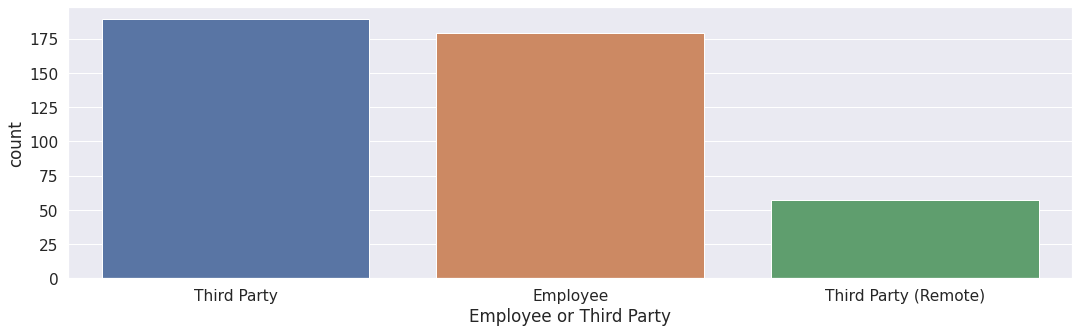

-----------------------------------------------------------------


In [ ]:
plt.figure(figsize=[18,5])
sns.countplot(data=df2,x=df2.columns[7])
plt.show()
plt.close()
print('-----------------------------------------------------------------')

### The number of records involving both Employees and Third Party seem to be almost equal while the number of incidents involving Third Party(Remote), which we are not very sure as to what it means, seems much lower. 
### Not very sure what they mean by Third Party here; however, looking at some of the descriptions, it seems that Third Party refers to visitors including inspectors, collaborators, operastors etc. 
### The fact that almost an equal number (in fact a marginally higher number of Third Party Personnel) of Employees and Third Party Personnel have been involved in the accidents could possibly mean that:
### 1. Appropriate Safety Measures are not in place for Visitors. If this is the case, then possibly these plants could have a "Safety Orientation Routine" to ensure that all Visitors are made aware of the risks and precautions involved; OR
### 2. These plants are not  equipped enough to handle Visitors such that the Employees are possiblyt aware of the safety measures but tend to slack when there are Visitors. If this is the case then possibly these plants could have "Appropriate Safety Training for the Employees" specifically making them aware that the Visitors may not be familiar with all the safety routines thus warranting the Employees to take the "Onus of Safety"; OR
### 3. Employees get nervous around the visitors and tend to make more mistakes. If this is the case, then making the Employees comfortable with the Visitors first may help calm the nerves.
### 4. There are a larger number of Third Party Personnel than the Employees in these industries; in this case they need to provide better training for the Third Party Personnel.


### Let's check their Normalized Value Counts:

In [ ]:
np.round(df2[df2.columns[7]].value_counts(normalize=True)*100)

Third Party             44.0
Employee                42.0
Third Party (Remote)    13.0
Name: Employee or Third Party, dtype: float64

In [ ]:
df2[df2.columns[7]].value_counts()

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64

### as expected from the countplot.
### 44% of the accidents involve Thirdy Party Personnel while 42% involve Employees.
### If we include remote as well, then the Third Party Count goes up to 57%. This is a very high count and needs to be dealt with seriously. 
### While it is true that safety is extremely important for everyone, if these plants remain so careless with Visitors, there are higher chances for them to be sued as well.

### Critical Risk:

In [ ]:
data = df2['Critical Risk'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df2.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker_color=px.colors.qualitative.Dark24,
               
               )
# Create layout
layout = dict(title = 'Distribution Of {} Sample'.format(df2.shape[0]),
              xaxis = dict(title = 'Critical Risk',color = '#000000'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer="colab")
iplot(fig)

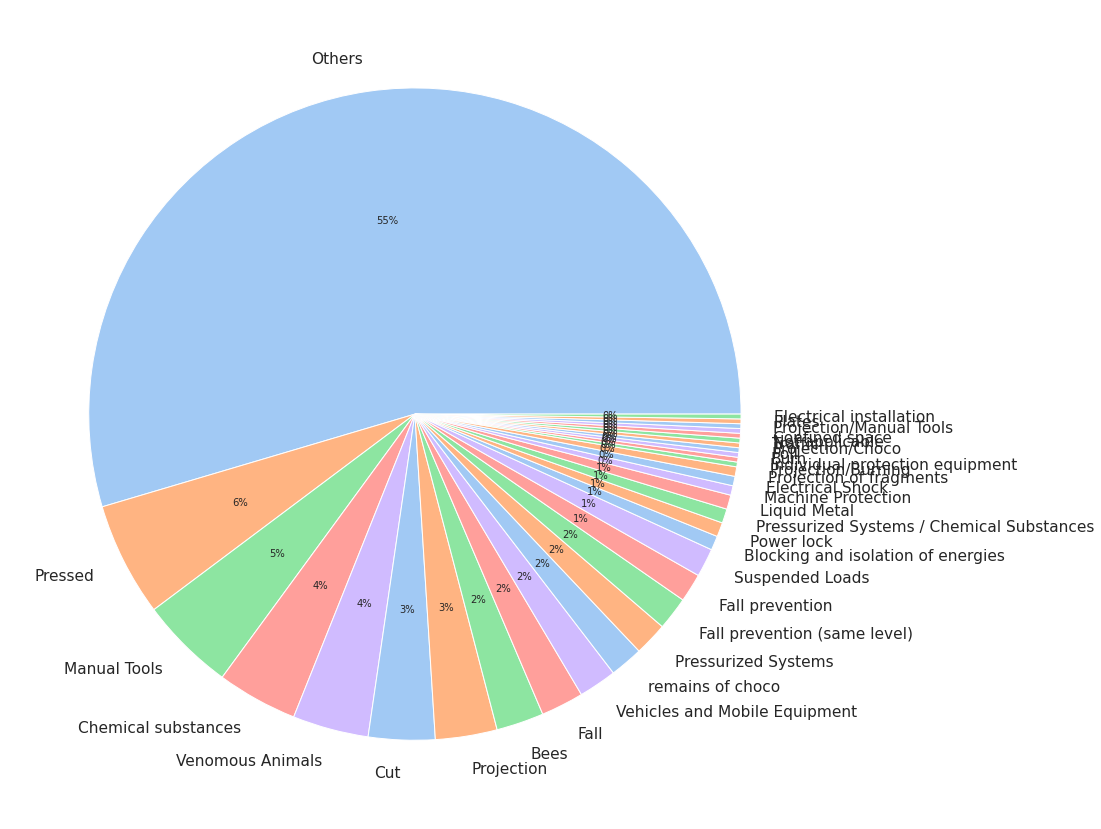

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
cat='Critical Risk'
#create pie chart
plt.figure(figsize=[15,15])
plt.pie(pd.DataFrame(df2[cat].value_counts().reset_index())[cat], labels = pd.DataFrame(df2[cat].value_counts().reset_index())['index'], colors = colors, autopct='%.0f%%')
plt.show()

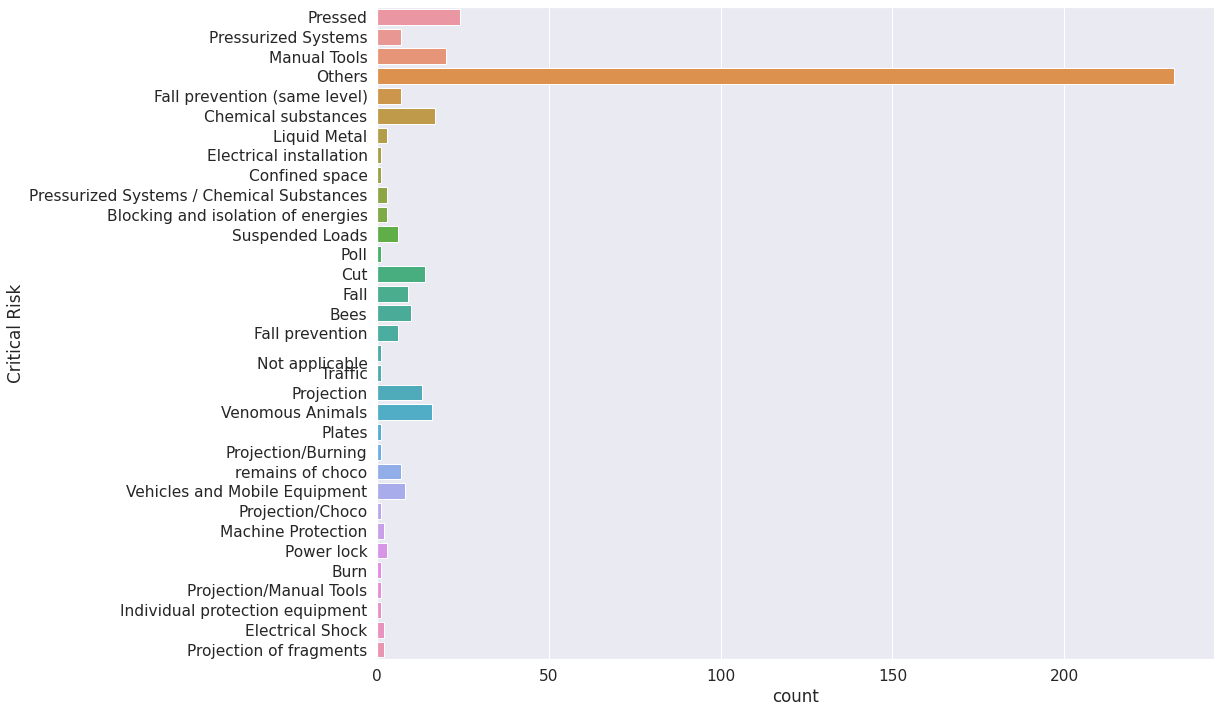

-----------------------------------------------------------------


In [ ]:
plt.figure(figsize=[15,12])
sns.countplot(data=df2,y=df2.columns[8])
plt.show()
plt.close()
print('-----------------------------------------------------------------')

### Can't say much since most of the records have the category 'Others'. That's not very helpful. That aside, the maximum accidents seem to have the Critical Label 'Pressed'. Let's take a look at a few descriptions of 'Pressed'.

In [ ]:
df2[df2['Critical Risk']=='Pressed'].head().style

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic technician José of the Tecnomin verified the transmission belts of the HM-100 pump at the Acid plant, he proceeded to turn the pulley manually; unexpectedly at that instant the electrician supervisor Miguel of the EKA Mining grabs the transmission belts to verify their tension, at which point the finger traps."
35,2016-02-18 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressed,"When replacing the telescopic expansion joint of the HDPE pipe of the storm drainage pumping system, it reports that the piece involuntarily moved when it was positioned in the holder, pressing its finger against the holder, causing a wound 1 right chemo."
43,2016-03-02 00:00:00,Country_02,Local_08,Metals,I,III,Male,Employee,Pressed,"The operator was in the center (Demag IV), performing maintenance. When transporting the hydraulic cylinder with the help of another operator the official was unbalanced coming the cylinder that carried to press his finger (Left thumb) against the pillar of support of the oven specified below (figure)."
58,2016-03-10 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Pressed,"The employee reports that when he lowered the cloths in the purification, he arranged the cart so that it would not grab the pipe, pressing his left hand between the cloths and the cart."


### 'Pressed' seems to refer to a hand or finger or some body part getting 'jammed'.

### Let's check their Normalized Value Counts:

In [ ]:
np.round(df2[df2.columns[8]].value_counts(normalize=True)*100)

Others                                       55.0
Pressed                                       6.0
Manual Tools                                  5.0
Chemical substances                           4.0
Venomous Animals                              4.0
Cut                                           3.0
Projection                                    3.0
Bees                                          2.0
Fall                                          2.0
Vehicles and Mobile Equipment                 2.0
remains of choco                              2.0
Pressurized Systems                           2.0
Fall prevention (same level)                  2.0
Fall prevention                               1.0
Suspended Loads                               1.0
Blocking and isolation of energies            1.0
Power lock                                    1.0
Pressurized Systems / Chemical Substances     1.0
Liquid Metal                                  1.0
Machine Protection                            0.0


In [ ]:
df2[df2.columns[8]].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
remains of choco                               7
Pressurized Systems                            7
Fall prevention (same level)                   7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Power lock                                     3
Pressurized Systems / Chemical Substances      3
Liquid Metal                                   3
Machine Protection                             2
Electrical Shock    

### As we saw with countplot, most of the entries are in the 'Others' category. Very very few incidents (1,2,3...) in most of the other categories. 

### That completes the basic countplot analysis.
### Next, we'll replace the accident level and the potential accident level with numbers instead of Roman Numerals and save this as df4.

In [ ]:
df4=df2.copy()

In [ ]:
df4['Accident Level'] = df4['Accident Level'].map({'I':1,'II':2,'III':3,'IV':4,'V':5,})
df4['Potential Accident Level'] = df4['Potential Accident Level'].map({'I':1,'II':2,'III':3,'IV':4,'V':5,'VI':6,})

### Let's check it:

In [ ]:
df4.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


### Excellent! Let's check its dtype now.

In [ ]:
df4.dtypes

Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level               int64
Potential Accident Level     int64
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

### Great! As expected, both columns have successfully been converted to Integers.
### Time to update the df_tracker.

In [ ]:
df_tracker=df_tracker.append({'df_name': 'df4',
            '# of Records': df4.shape[0],
            '# of Columns': df4.shape[1],
            'Remarks': "Accident and Potential Accident Levels from df2, converted from Roman Numerals to integers."},ignore_index=True)
df_tracker

,df_name,# of Records,# of Columns,Remarks
0,df1,425,11,Original DataFrame
1,df2,425,10,dropped Unnamed Attribute from df1
2,df3,418,10,dropped Duplicated Records from df2
3,df4,425,10,Accident and Potential Accident Levels from df...


### Next, we'll add a new column called 'Latent Safety Index' which basically takes the difference between the Potential Accident Level and the Actual Accident Level. The higher the difference, the higher the Latent Safety Index. A Latent Safety Index (LSI) of 0 means that the maximum possible damage happened due to the accident. 
### Therefore, the Latent Safety Index forms a good measure of "how severe the accident could have been but was averted" due to quick presence of mind or good safety features or just plain luck.

In [ ]:
df4['Latent Safety Index']=df4['Potential Accident Level']-df4['Accident Level']
df4

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Latent Safety Index
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,3
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,3
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,0
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,0
...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,1,3,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,1,2,Female,Employee,Others,The collaborator moved from the infrastructure...,1
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,1,2,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,1
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,1,2,Male,Employee,Cut,The Employee performed the activity of strippi...,1


### Let's analyse the LSI now:

### LSI:

In [ ]:
data = df4['Latent Safety Index'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df4.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker_color=px.colors.qualitative.Dark24,
               
               )
# Create layout
layout = dict(title = 'Distribution Of {} Sample'.format(df4.shape[0]),
              xaxis = dict(title = 'Latent Safety Index',color = '#000000'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show(renderer="colab")
iplot(fig)

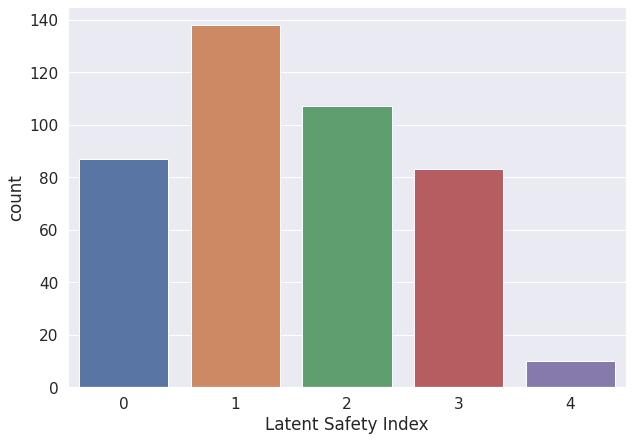

-----------------------------------------------------------------


In [ ]:
plt.figure(figsize=[10,7])
sns.countplot(data=df4,x=df4.columns[-1])
plt.show()
plt.close()
print('-----------------------------------------------------------------')

### At first glance, it is not very promising. Extremely few incidents have an LSI of 4 and most of them have an LSI of 1, closely followed by 2 and 0. This means that most of the recorded incidents reached their Maximum Possible Potential. An LSI of 1 means that most of these incidents almost caused the Maximum Damage Possible. This definitely shows that there is a lot of scope for Damage Control and Safety Enhancement in these industries.

### Let's check their Normalized Value Counts:

In [ ]:
np.round(df4[df4.columns[-1]].value_counts(normalize=True)*100)

1    32.0
2    25.0
0    20.0
3    20.0
4     2.0
Name: Latent Safety Index, dtype: float64

In [ ]:
df4[df4.columns[-1]].value_counts()

1    138
2    107
0     87
3     83
4     10
Name: Latent Safety Index, dtype: int64

### 52% of the accidents have an LSI of 0 and 1. Not good news.

### Next, let's check which cities belong to which of the countries.

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    int64 
 5   Potential Accident Level  425 non-null    int64 
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
 10  Latent Safety Index       425 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 36.6+ KB


In [ ]:
data = df4['Countries'].value_counts().sort_index(ascending=False)
data

Country_03     44
Country_02    130
Country_01    251
Name: Countries, dtype: int64

### Bivariate Analysis

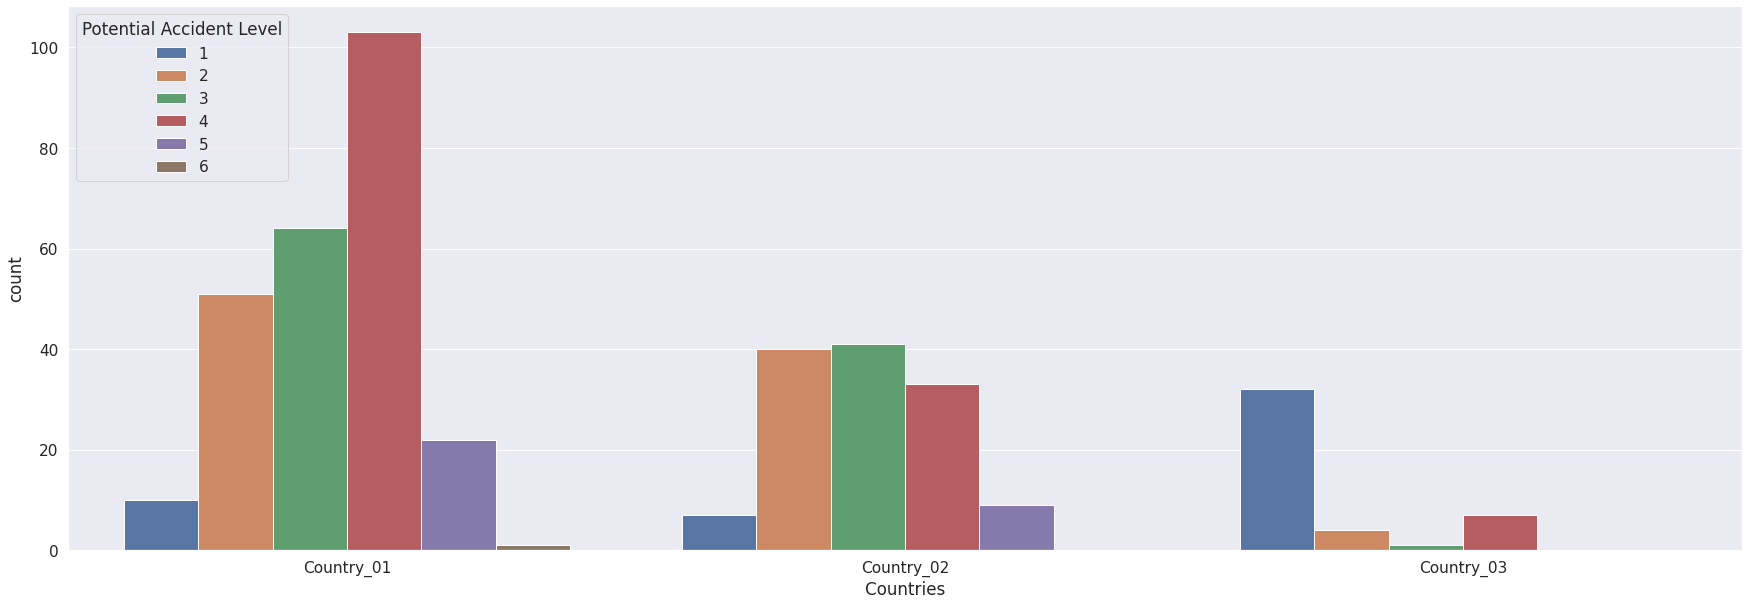

In [ ]:
# Bivariate
fig=plt.figure(figsize=(30,10))
sns.countplot(x='Countries',hue='Potential Accident Level',data=df4)
# x=plt.setp(ax.get_xticklabels(), rotation=45)

- Country_01 has more number of severe accidents especially Level IV

- Country_02 has moderate accidents across all the levels

- Country_03 'level I' accidents counts is more compared to country_01 and country_02 but less severe accidents.

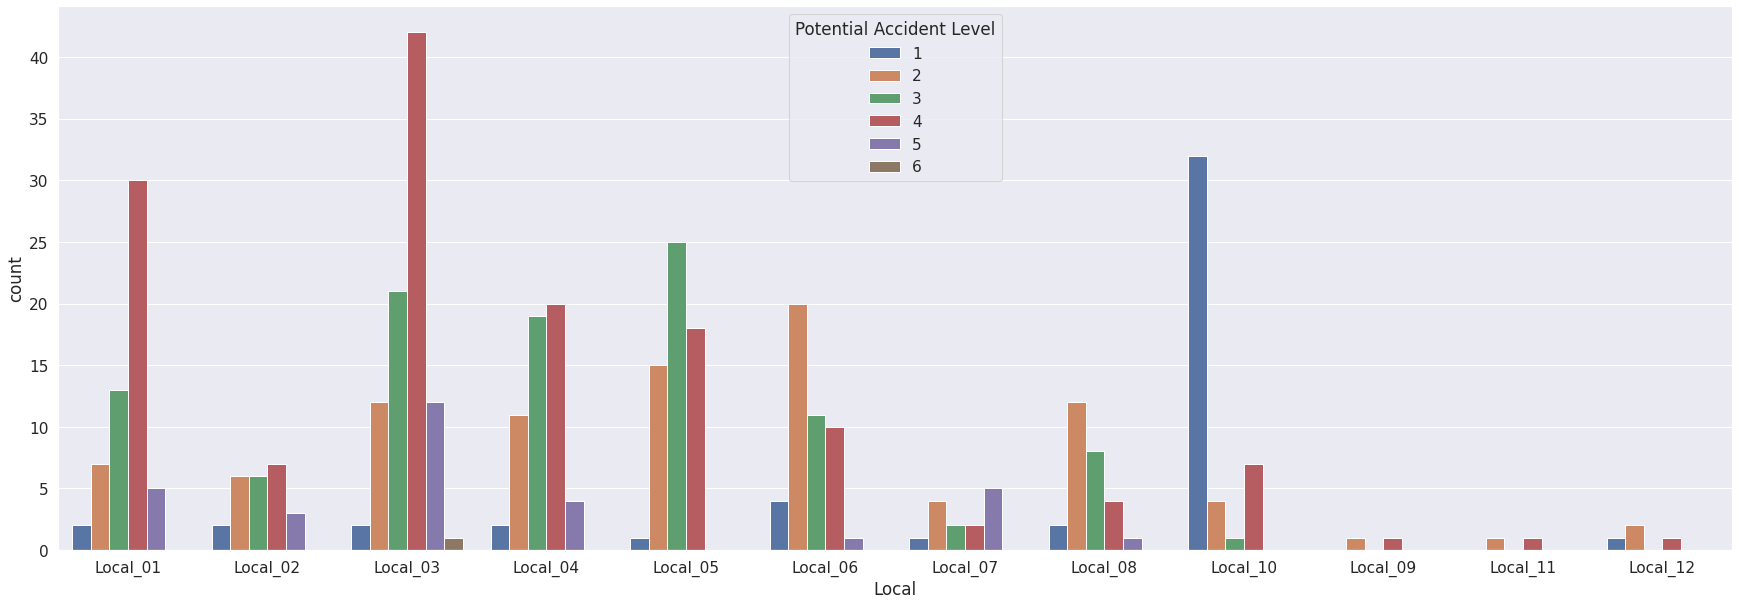

In [ ]:
# Bivariate
fig=plt.figure(figsize=(30,10))
sns.countplot(x='Local',hue='Potential Accident Level',data=df4)
# x=plt.setp(ax.get_xticklabels(), rotation=45)

- Local_03 (which also belongs to Country_01) is where most of the accidents happen

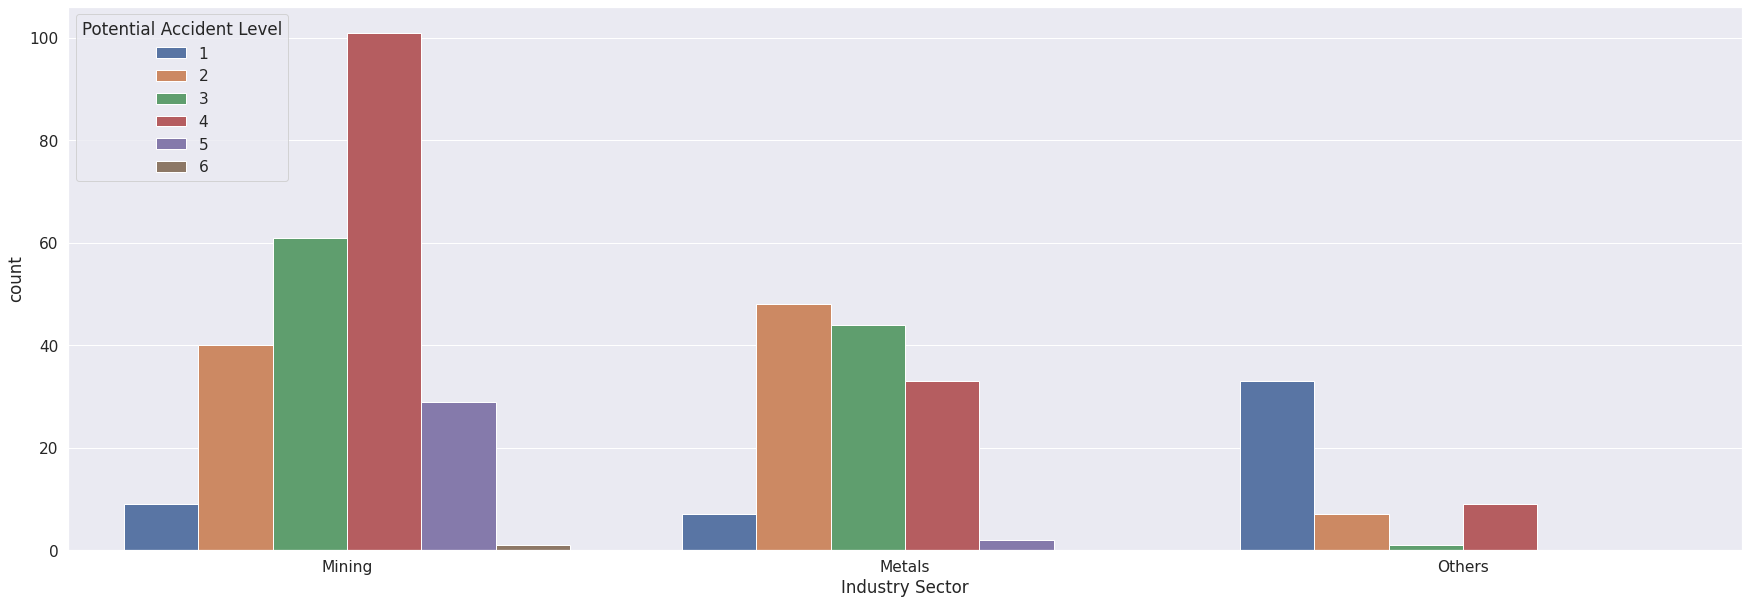

In [ ]:
# Bivariate
fig=plt.figure(figsize=(30,10))
sns.countplot(x='Industry Sector',hue='Potential Accident Level',data=df4)

- Out of all industries, Mining Industry has seen some accidents whose level is the most severe and the corresponding potential Accident level is also highest.

- This is followed by Metal industry and other.

- Severity levels of the incidents are more in Mining sector (rate of level 4 is slightly higher than the level 2 & 3)

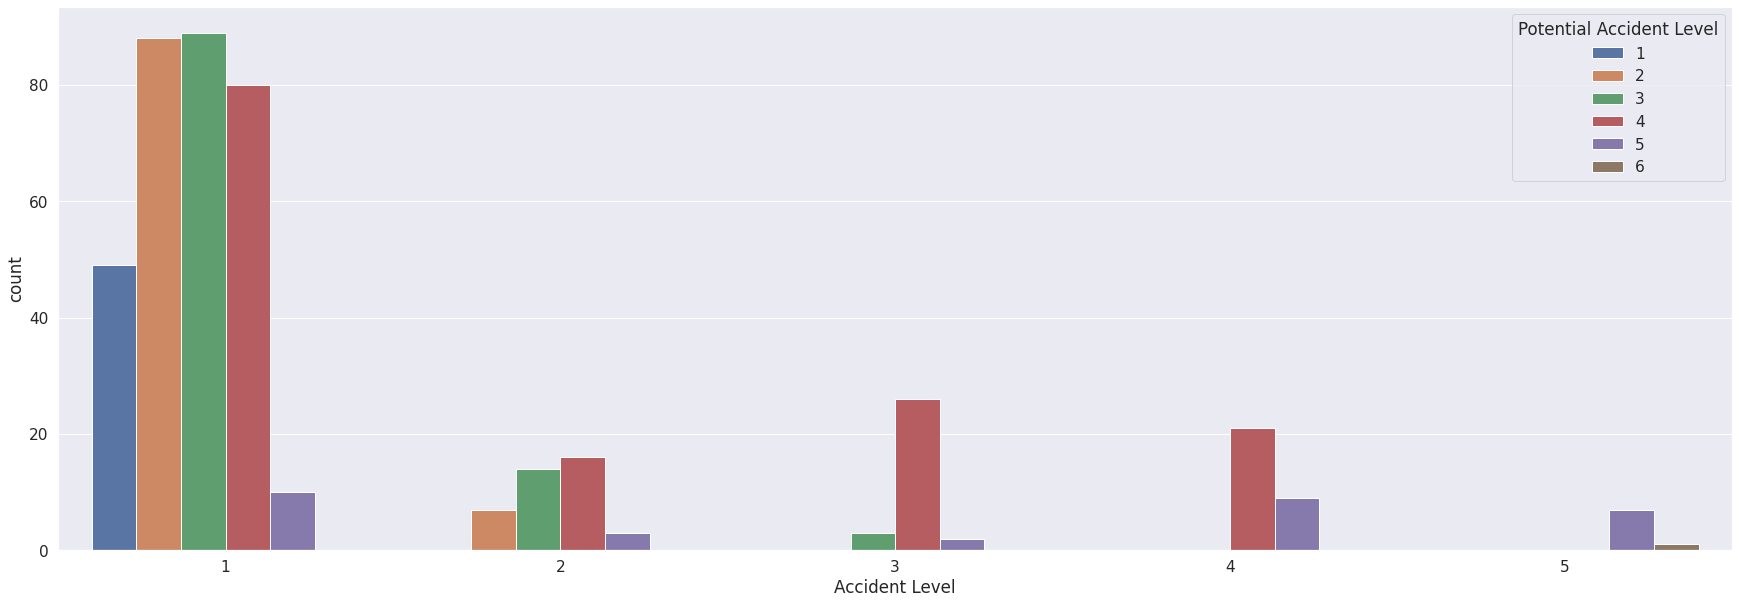

In [ ]:
# Bivariate
fig=plt.figure(figsize=(30,10))
sns.countplot(x='Accident Level',hue='Potential Accident Level',data=df4)

- Most Level 1 accidents had the potential of being much Severe i.e. of Potential Level 4

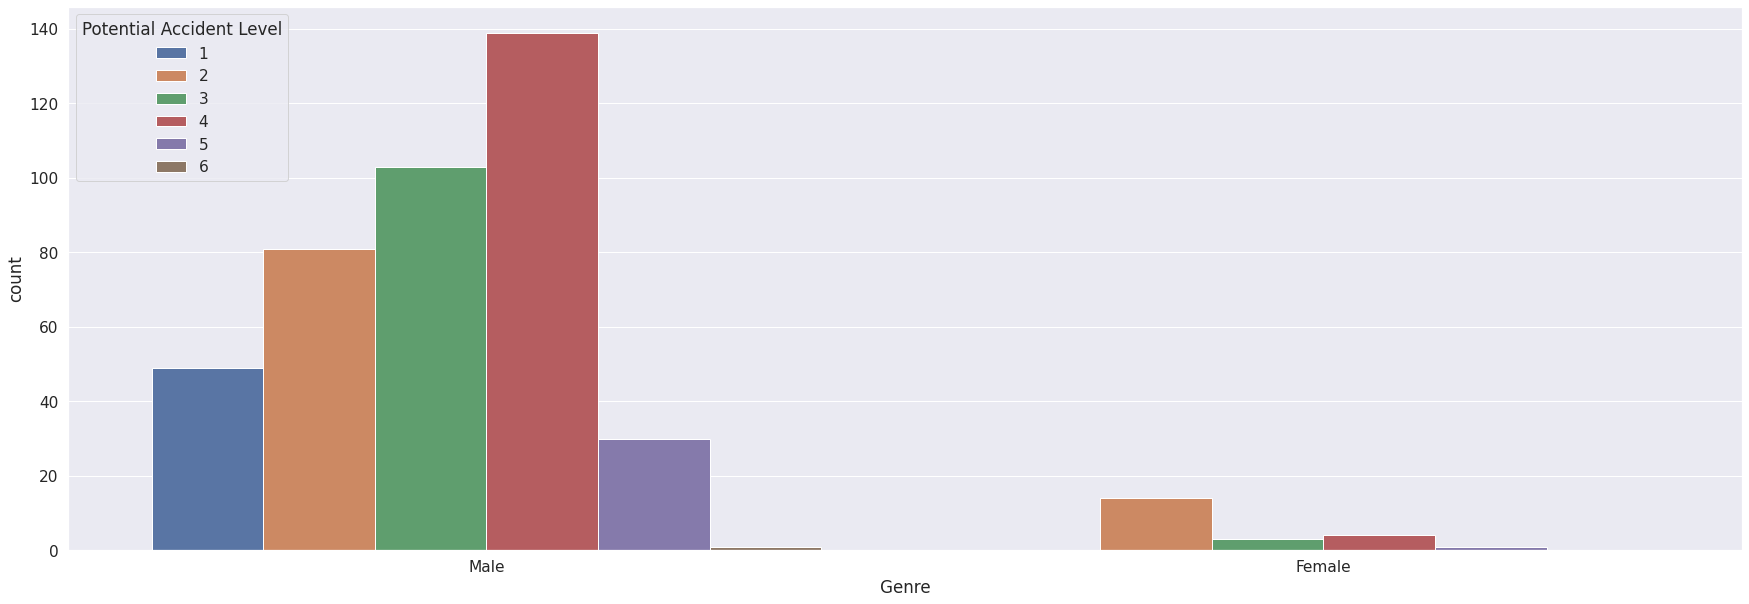

In [ ]:
# Bivariate
fig=plt.figure(figsize=(30,10))
sns.countplot(x='Genre',hue='Potential Accident Level',data=df4)

- Men are most likely to face High Potential Accidents of Level 4 and 3 followed 2 and 5

- Women are most likely to face Moderate Potential Accidents of Level 2 and 3 followed 4 and 5

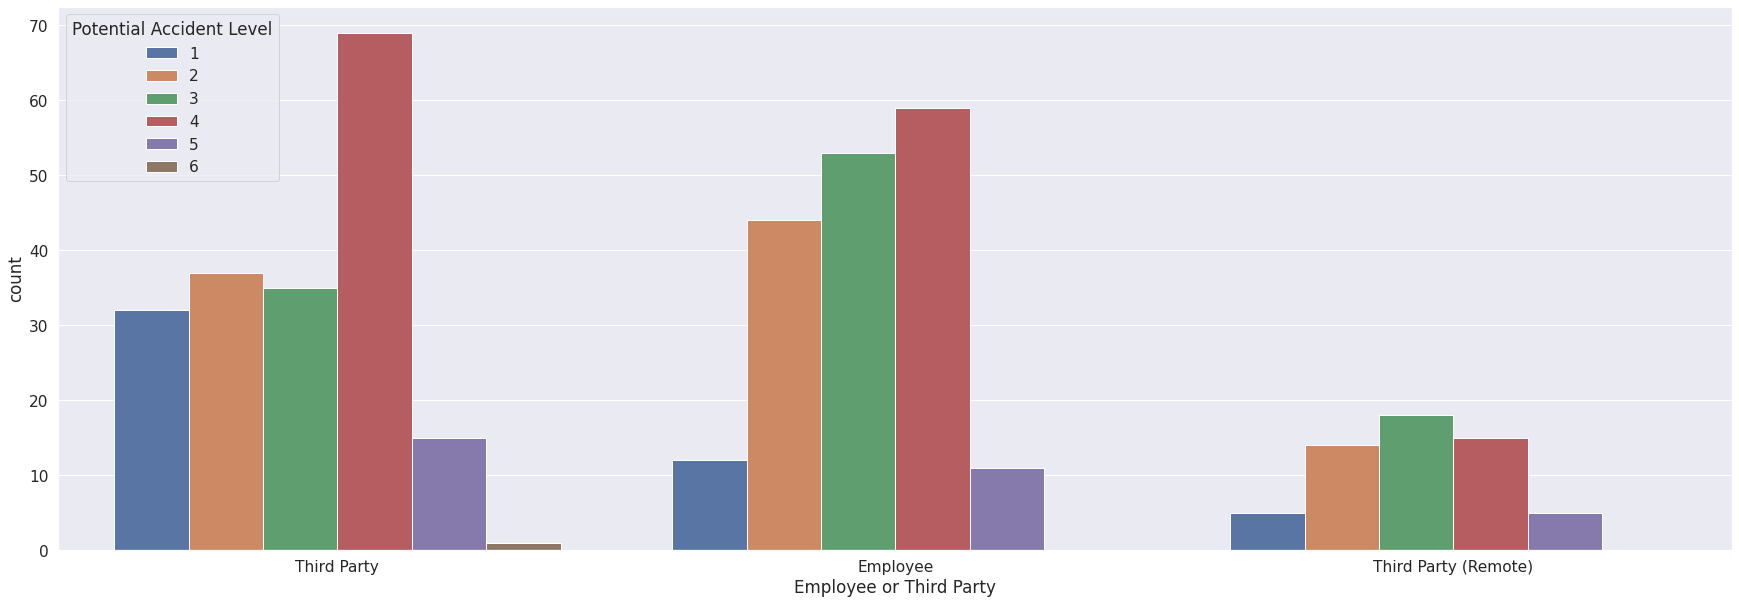

In [ ]:
# Bivariate
fig=plt.figure(figsize=(30,10))
sns.countplot(x='Employee or Third Party',hue='Potential Accident Level',data=df4)

- Third Party Employees are more involved in Accidents

- We can observe that apart from Accident_Level_1 the people are also facing severe accidents (Accident_Level_4) in the industry.

NameError: ignored

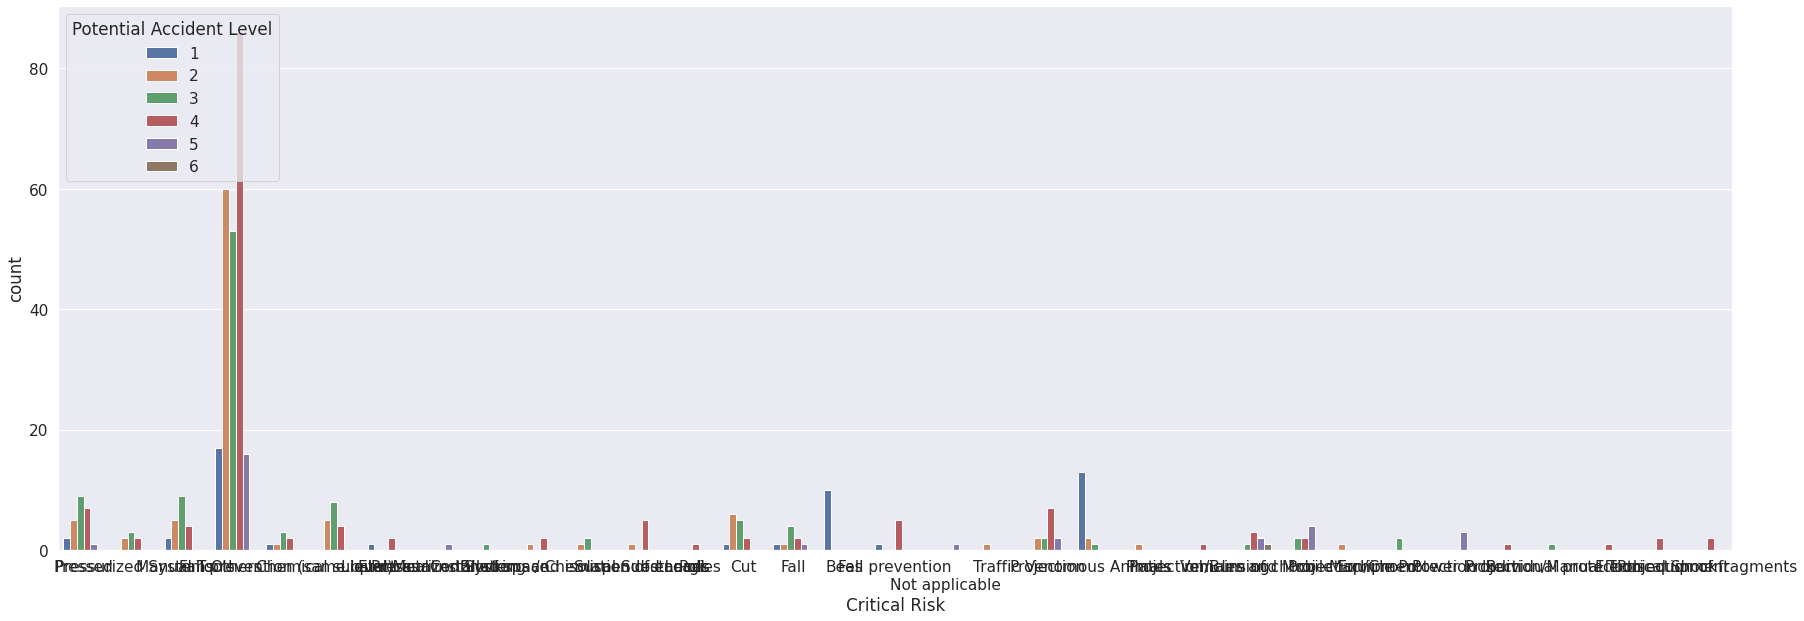

In [ ]:
# Bivariate
fig=plt.figure(figsize=(30,10))
sns.countplot(x='Critical Risk',hue='Potential Accident Level',data=df4)
x=plt.setp(ax.get_xticklabels(), rotation=45)

- Accidents labeled with Pressed as Critical Risk tend to be much severe i.e. of Level 4

- Accidents labeled with Manual Tools as Critical Risk tend to be less severe i.e. of Level 1

- Accidents labeled with Pressurized Systems as Critical Risk tend to be moderate i.e. of Level 2 or 3

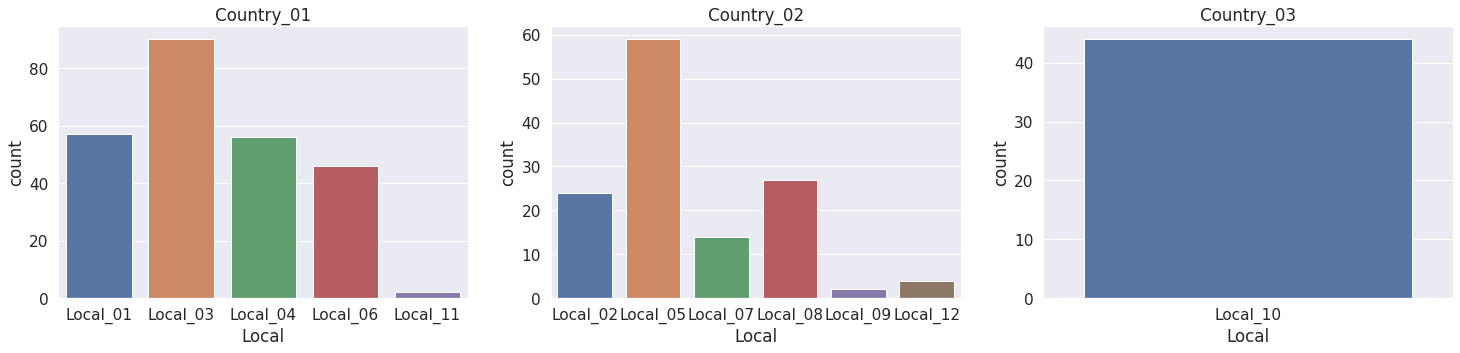

In [ ]:
plt.figure(figsize=[25,5])
plt.subplot(1,3,1)
plt.title('Country_01')
sns.countplot(data=df4[df4['Countries']=='Country_01'],x='Local')
plt.subplot(1,3,2)
plt.title('Country_02')
sns.countplot(data=df4[df4['Countries']=='Country_02'],x='Local')
plt.subplot(1,3,3)
plt.title('Country_03')
sns.countplot(data=df4[df4['Countries']=='Country_03'],x='Local')
# plt.show()
# plt.close()
# print('-----------------------------------------------------------------')

In [ ]:
df4[df4['Countries']=='Country_01']['Local'].value_counts()

Local_03    90
Local_01    57
Local_04    56
Local_06    46
Local_11     2
Name: Local, dtype: int64

In [ ]:
df4[df4['Countries']=='Country_02']['Local'].value_counts()

Local_05    59
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Name: Local, dtype: int64

In [ ]:
df4[df4['Countries']=='Country_03']['Local'].value_counts()

Local_10    44
Name: Local, dtype: int64

### Country_03 has only 1 plant; that explains why such few incidents were recorded in this country.
### Country_01 has 5 plants; and
### Country_02 has 6 plants.
### yet, if you remember, we saw that Country_01 has the maximum number of recorded incidents.
### So, let's introduce another Parameter - Average Incidents per Plant per Country. We'll name this Column - AIPC

### All we need to do is to divide the total number of incidents recorded per country by the number of plants in that country.
### Therefore, AIPC=(Total incidents in the county)/(total plants in the country)

In [ ]:
df4['Countries'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64

In [ ]:
Country_01_AIPC=(df4['Countries'].value_counts()['Country_01'])/5
Country_02_AIPC=(df4['Countries'].value_counts()['Country_02'])/6
Country_03_AIPC=(df4['Countries'].value_counts()['Country_03'])/1

In [ ]:
Country_01_AIPC,Country_02_AIPC,Country_03_AIPC

(50.2, 21.666666666666668, 44.0)

### As can be seen, Country_02 has the least AIPC. This means that Country_02 has had the least recorded incidents per plant. Therefore, there is a very strong possibility that Country_02 has the best safety measures in place.
### To further explore this, let's also check the Average LSI Value per Country and then compare this figure with the AIPC for each country.

### Country_01

In [ ]:
np.round(df4[df4['Countries']=='Country_01']['Latent Safety Index'].mean(),2)

1.67

### Country_02

In [ ]:
np.round(df4[df4['Countries']=='Country_02']['Latent Safety Index'].mean(),2)

1.61

### Country_03

In [ ]:
np.round(df4[df4['Countries']=='Country_03']['Latent Safety Index'].mean(),2)

0.3

### Remember that a higher LSI and a lower AIPC value is better from a safety point of view.
### Both Country_01 and _02 have almost the same LSI of 1.67 and 1.61; while Country_03 has an extremely low LSI of 0.3.
### Clearly, Country_03, although having only One Plant has a strict need for attention on safety since it has such a high AIPC score of 44 and an equally low LSI score of 0.3

### Next, let's check the average LSI per plant:

In [ ]:
for plant in df4['Local'].unique():
  print('Average LSI(%s)=%0.2f' %(plant,np.round(df4[df4['Local']==plant]['Latent Safety Index'].mean(),2)))

Average LSI(Local_01)=2.04
Average LSI(Local_02)=1.58
Average LSI(Local_03)=1.99
Average LSI(Local_04)=1.29
Average LSI(Local_05)=1.85
Average LSI(Local_06)=1.09
Average LSI(Local_07)=1.71
Average LSI(Local_08)=1.15
Average LSI(Local_10)=0.30
Average LSI(Local_09)=1.00
Average LSI(Local_11)=1.00
Average LSI(Local_12)=1.25


### As can be seen, Local_01 has the highest Average LSI of 2.04, closely followed by Local_03 with an Average LSI of 1.99 and Local_05 with 1.85. Local_01 and _03 are from Country_01 and Local_05 is from Country_02.
### As expected, Local_10 (from Country_03) has the lowest Average LSI of 0.3.

### Next, let's analyse the sectors:

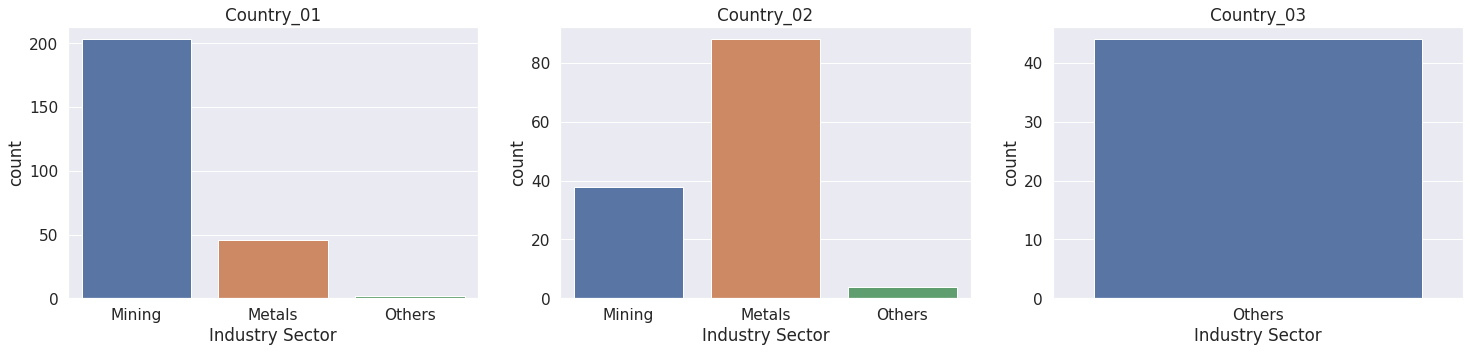

In [ ]:
plt.figure(figsize=[25,5])
plt.subplot(1,3,1)
plt.title('Country_01')
sns.countplot(data=df4[df4['Countries']=='Country_01'],x='Industry Sector')
plt.subplot(1,3,2)
plt.title('Country_02')
sns.countplot(data=df4[df4['Countries']=='Country_02'],x='Industry Sector')
plt.subplot(1,3,3)
plt.title('Country_03')
sns.countplot(data=df4[df4['Countries']=='Country_03'],x='Industry Sector')
# plt.show()
# plt.close()
# print('-----------------------------------------------------------------')

In [ ]:
df4[df4['Countries']=='Country_01']['Industry Sector'].value_counts()

Mining    203
Metals     46
Others      2
Name: Industry Sector, dtype: int64

In [ ]:
df4[df4['Countries']=='Country_02']['Industry Sector'].value_counts()

Metals    88
Mining    38
Others     4
Name: Industry Sector, dtype: int64

In [ ]:
df4[df4['Countries']=='Country_03']['Industry Sector'].value_counts()

Others    44
Name: Industry Sector, dtype: int64

### Very interesting. As can be seen, Country_01 predominantly has Mining Sectors while Country_02 predominantly has Metal. This could also be the reason that Country_01 has a higher AIPC. If you recollect, we saw earlierr that Mining had more number of records than Metal and Others. 
### Also, the plant at Country_03 is in the Others category.

In [ ]:
for plant in df4['Local'].unique():
  print('-----------------------------------------')
  print("plant:",plant)
  print(df4[df4['Local']==plant]['Industry Sector'].value_counts())
  print('-----------------------------------------')

-----------------------------------------
plant: Local_01
Mining    57
Name: Industry Sector, dtype: int64
-----------------------------------------
-----------------------------------------
plant: Local_02
Mining    24
Name: Industry Sector, dtype: int64
-----------------------------------------
-----------------------------------------
plant: Local_03
Mining    90
Name: Industry Sector, dtype: int64
-----------------------------------------
-----------------------------------------
plant: Local_04
Mining    56
Name: Industry Sector, dtype: int64
-----------------------------------------
-----------------------------------------
plant: Local_05
Metals    59
Name: Industry Sector, dtype: int64
-----------------------------------------
-----------------------------------------
plant: Local_06
Metals    46
Name: Industry Sector, dtype: int64
-----------------------------------------
-----------------------------------------
plant: Local_07
Mining    14
Name: Industry Sector, dtype: int64

### As can be seen,
### Locals - 01,02,03,04 and 07 belong to the Mining Sector
### Locals - 05,06, 08 and 09 belong to Metals; and
### Locals - 10,11 and 12 belong to Others

### Next, we'll check the Average LSI Industry-wise:

In [ ]:
for sector in df4['Industry Sector'].unique():
  print('Average LSI(%s)=%0.2f' %(sector,np.round(df4[df4['Industry Sector']==sector]['Latent Safety Index'].mean(),2)))

Average LSI(Mining)=1.78
Average LSI(Metals)=1.43
Average LSI(Others)=0.40


### Nice to see that Mining has the highest Average LSI of 1.78, closely followed by Metals with a value of 1.43.
### Once again, we see that 'Others' has a very low Average LSI of 0.4
### Time and again we have seen that the safety values associated with the 'Others' category is not very good. Added to this, the very fact that the Category has been named 'Others' could also indicate that these Industry Sectors are yet to have Well Established Safety Standards. Therefore, it would be a good idea to better organize these sectors.

### Let's do a bit of bivariate analysis now. Let's look at scatter plots between the Actual Accident Level and the Potential Accident Level. To get a better understanding of this, let us normalise the values with respect to the mean so that we can do a Quadrant Analysis. 

### Going ahead and adding 2 new Features:
### norm_AAL => Normalized Actual Accident Levels
### norm_PAL => Normalized Potential Accident Levels

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    int64 
 5   Potential Accident Level  425 non-null    int64 
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
 10  Latent Safety Index       425 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 36.6+ KB


In [ ]:
df5=df4.copy()

In [ ]:
df5['norm_AAL']=df5['Accident Level']-df5['Accident Level'].mean()
df5['norm_PAL']=df5['Potential Accident Level']-df5['Potential Accident Level'].mean()
df5

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Latent Safety Index,norm_AAL,norm_PAL
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,3,-0.527059,0.964706
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,3,-0.527059,0.964706
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2,-0.527059,-0.035294
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,0,-0.527059,-2.035294
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,0,2.472941,0.964706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,1,3,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2,-0.527059,-0.035294
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,1,2,Female,Employee,Others,The collaborator moved from the infrastructure...,1,-0.527059,-1.035294
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,1,2,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,1,-0.527059,-1.035294
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,1,2,Male,Employee,Cut,The Employee performed the activity of strippi...,1,-0.527059,-1.035294


### Let's plot a scatter of this and check:

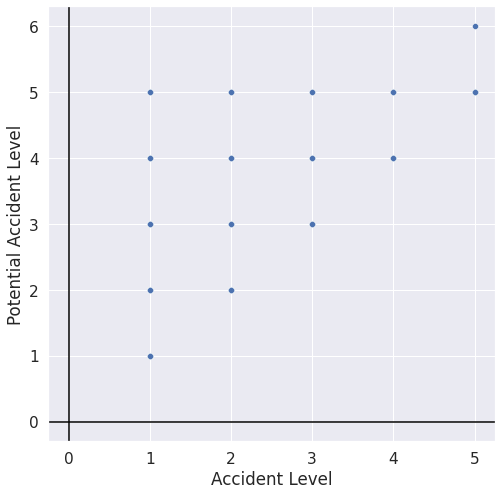

In [ ]:
plt.figure(figsize=[8,8])
sns.scatterplot(data=df5,x='Accident Level',y='Potential Accident Level');
plt.axvline(x=0, c='black',label="x=0")
plt.axhline(y=0, c='black',label="y=0")

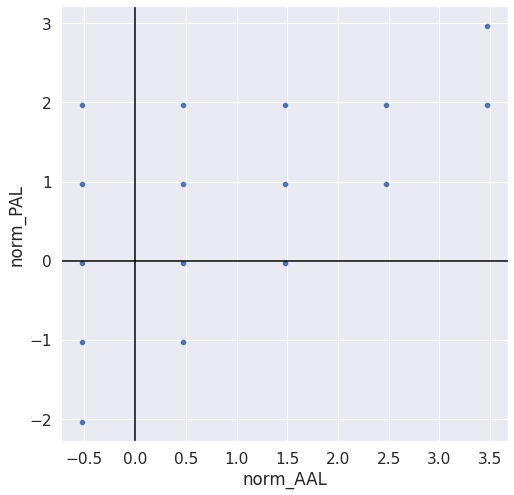

In [ ]:
plt.figure(figsize=[8,8])
sns.scatterplot(data=df5,x='norm_AAL',y='norm_PAL');
plt.axvline(x=0, c='black',label="x=0")
plt.axhline(y=0, c='black',label="y=0")

### Oh oh! What do we see here? Just 16 Datapoints out of 425 Datapoints! I guess there are a lot of over-lapping points here. This could lead to a Visual Paradox. 
### Let's check the value_counts() to see the number of unique values.

In [ ]:
df5['norm_AAL'].value_counts(),df5['norm_PAL'].value_counts()

(-0.527059    316
  0.472941     40
  1.472941     31
  2.472941     30
  3.472941      8
 Name: norm_AAL, dtype: int64,  0.964706    143
 -0.035294    106
 -1.035294     95
 -2.035294     49
  1.964706     31
  2.964706      1
 Name: norm_PAL, dtype: int64)

### That explains it. A total of only 5+6=11 unique values in both columns put together.

### In order to do a Quadrant Analysis. Let's extract the number of Datapoints in each Quadrant. However, before we do this, let us visualize the over-lapping Datapoints by adding a bit of Random noise. 
### To do this, we'll add a Column called 'noise'.

In [ ]:
df5['noise']=1
df5['noise']=df5['noise'].apply(lambda x: x*np.random.randn()*0.1)
df5.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Latent Safety Index,norm_AAL,norm_PAL,noise
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,3,-0.527059,0.964706,-0.098601
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,3,-0.527059,0.964706,0.030308
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2,-0.527059,-0.035294,0.121065
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,0,-0.527059,-2.035294,0.224968
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,0,2.472941,0.964706,0.130946


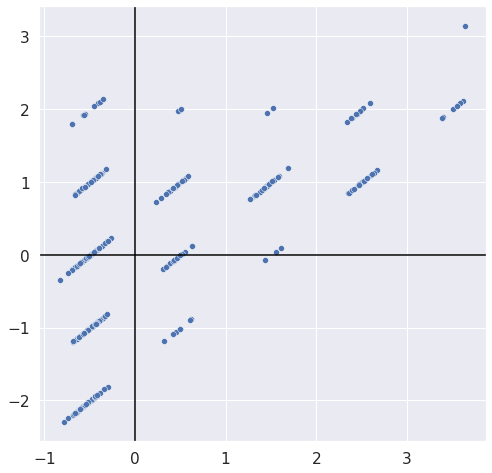

In [ ]:
plt.figure(figsize=[8,8])
sns.scatterplot(x=df5['norm_AAL']+df5['noise'],y=df5['norm_PAL']+df5['noise']);
plt.axvline(x=0, c='black',label="x=0")
plt.axhline(y=0, c='black',label="y=0")

### There, looks much better. We can atleast see the over-lapping points.

### Back to the Quadrant Analysis. In order to do this we'll first get the number of Datapoints and store them under the variables q1,q2,q3 and q4 respectively.

In [ ]:
q1=df5[(df5['norm_AAL']>0) & (df5['norm_PAL']>0)].shape[0]
q2=df5[(df5['norm_AAL']<0) & (df5['norm_PAL']>0)].shape[0]
q3=df5[(df5['norm_AAL']<0) & (df5['norm_PAL']<0)].shape[0]
q4=df5[(df5['norm_AAL']>0) & (df5['norm_PAL']<0)].shape[0]

In [ ]:
print("Quadrant 1 = %i" %q1)
print("Quadrant 2 = %i" %q2)
print("Quadrant 3 = %i" %q3)
print("Quadrant 4 = %i" %q4)

Quadrant 1 = 85
Quadrant 2 = 90
Quadrant 3 = 226
Quadrant 4 = 24


In [ ]:
ql=np.array([q1,q2,q3+q4])
label_=["High Potential High Actual","High Potential  Low Actual","Low Potential  Low Actual"]

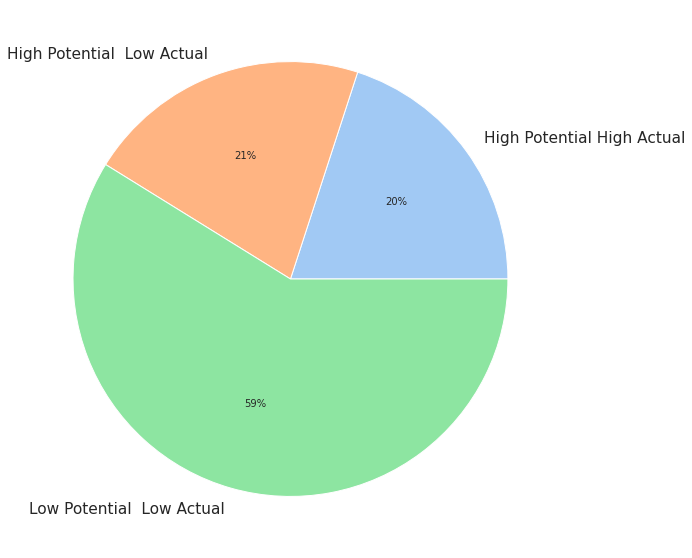

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
cat='Industry Sector'
#create pie chart
plt.figure(figsize=[10,10])
plt.pie(ql, labels = label_, colors = colors, autopct='%.0f%%')
plt.show()

### Much better! Now we are able to get the actual numbers.
### Qadrant Analysis Explanation:
### Quadrant 1 => Contains Datapoints with both High Potential Accident Level and High Actual Accident Level. Clearly, the LSI value of these datapoints will be low. A large number of datapoints in this quadrant indicates that most Accidents almost reached their Maximum Potential.
### Quadrant 2 => Contains Datapoints with High Potential Accident Level and Low Actual Accident Level. The LSI value of these datapoints will be high. A large number of Datapoints in this quadrant indicates that most Accidents had High Potential; however, the Actual Accidents were relatively minor. A large number of datapoints in this quadrant could possibly indicate that better safety measures are in place.
### Quadrant 3 => Contains Datapoints with both Low Potential Accident Level and Low Actual Accident Level. Clearly, the LSI value of these datapoints will be low; however, a large number of datapoints in this quadrant indicates that most Accidents were minor accidents.
### Quadrant 4 => Technically this quadrant shouldn't exist since by definition the Actual Accident Level can never exceed the Potential Accident Level. However, since the Actual Accident Level and the Potential Accident Level have different means, there are chances that a minority of datapoints may end up in the 4th Quadrant. Again, similar to the 3rd Quadrant, the 4th Quadrant reflects datapoints with a low Potential Accident Level. Hence, for our Analysis, we can combine the Datapoints in the 3rd and the 4th Quadrant.

### Quadrant Analysis Inference:
### Combining Quadrants 3 and 4 shows us that there are exactly 226+24=250 out of the 425 datapoints in these two quadrants. That's good news since it means that more than 50% of the Datapoints were not only minor accidents but also were Potentially Minor Accidents.
### 90 of the 425 Datapoints are in Quadrant 2. This is also a good sign since it means that all these incidents could have resulted in Potentially Dangerous Situations however were managed and the actual incidents turned out to be minor
### 85 of the 425 Datapoints are in Quadrant 1. This is our primary concern. These include incidents which had High Potential Damage and also resulted in High Damage.


### Next, Let's analyse the Date Feature which has been incorrectly labelled as Data - Seriously; how funny is that? And if you think that is funny, take a look at the Gender column which has been labelled as 'Genre'; almost like saying - 
### A - "Do you like getting married?" 
### B - "Yes"
### A- "Oh! Great! Which Genre do you prefer?"
### Hahahah!!! Can't stop laughing!

### The first thing is to a load a function we created called Timestamp. This function converts the date to a unix timestamp and adds it as a new column.

In [ ]:
def timestamp(df,col,form='YYYY-MM-DD hh:mm:ss'):
    """Enter a DataFrame,Time Column Name and Format including delimiters to get a new DataFrame returned with 
    the Unix Timestamp as a column next to the Time Column."""
    
    import pandas as pd
    import numpy as np
    import datetime
    import time
    import re
    
    #--------------------------------------------------------------------------------------------------------------------------
    #Create a copy of the DataFrame
    
    df1=df.copy()
    
    #--------------------------------------------------------------------------------------------------------------------------
    #If timestamp column already exists in the DataFrame, drop it.
    
    if 'timestamp' in df1.columns:
        df1.drop(columns='timestamp',inplace=True)
        
    timestamp=pd.Series(data=np.arange(df1.shape[0])) #timestamp int Series which has the length = Number of Records in df

    #--------------------------------------------------------------------------------------------------------------------------
    #Create a timestamp series of dtype int and get the index of the column next to the Time Column
    #in order to insert the timestamp column next to the col (time) column
    
    k=0
    for i in df1: #Cycle through the column names in df where k corresponds to the index number of the column
        if i == col: 
            inx=k #Get the index number of the col passed by the user and assign it to a variable inx
        k=k+1    

    df1.insert(loc=inx+1,column='timestamp',value=timestamp) 
    #Insert series timestamp as a column with loc=inx+1; next to col


    #--------------------------------------------------------------------------------------------------------------------------
    
    month1=['na','jan','feb','mar','apr','may','jun','jul',
            'aug','sep','oct','nov','dec']
    
    month2=['na','january','february','march','april','may','june','july',
            'august','september','october','november','december']
    
    #--------------------------------------------------------------------------------------------------------------------------
    #sub functions
    
    def m0(x):
        if x[0].isalpha():
            x[0]= x[0].lower()

            if x[0] in month1:
                x[0]=month1.index(x[0])

            elif x[0] in month2:
                x[0]=month2.index(x[0])

            else:
                print('ERROR! INVALID MONTH.')
    
    def m1(x):
        if x[1].isalpha():
            x[1]= x[1].lower()

            if x[1] in month1:
                x[1]=month1.index(x[1])

            elif x[1] in month2:
                x[1]=month2.index(x[1])

            else:
                print('ERROR! INVALID MONTH.')

    def m2(x):
        if x[2].isalpha():
            x[2]= x[2].lower()

            if x[2] in month1:
                x[2]=month1.index(x[2])

            elif x[2] in month2:
                x[2]=month2.index(x[2])

            else:
                print('ERROR! INVALID MONTH.')

                
    #--------------------------------------------------------------------------------------------------------------------------
    #--------------------------------------------------------------------------------------------------------------------------
    #Function applied on Default Value
    
    if form=='YYYY-MM-DD hh:mm:ss':      

        sep='[-|:|\s]\s*'

        j=0
        for i in df1[col]:
            ts1=re.split(sep,i)
            
            m1(ts1)
            
            dt = datetime.datetime(int(ts1[0]),int(ts1[1]),int(ts1[2]),int(ts1[3]),int(ts1[4]),int(ts1[5]))
            ts2=time.mktime(dt.timetuple())
            df1.at[j,'timestamp']=ts2
            j=j+1

        return(df1)
    
    #--------------------------------------------------------------------------------------------------------------------------
    else: #Function applied on Non-Default Value
    #--------------------------------------------------------------------------------------------------------------------------
        #Form List
    
        form_list=['YYYYDDMMhhmmss','DDMMYYYYhhmmss','MMDDYYYYhhmmss',
                   'YYMMDDhhmmss','YYDDMMhhmmss','DDMMYYhhmmss','MMDDYYhhmmss',
                  'YYYYMMDDhhmm','YYYYDDMMhhmm','DDMMYYYYhhmm','MMDDYYYYhhmm',
                  'YYMMDDhhmm','YYDDMMhhmm','DDMMYYhhmm','MMDDYYhhmm',
                  'YYYYMMDDhh','YYYYDDMMhh','DDMMYYYYhh','MMDDYYYYhh',
                  'YYMMDDhh','YYDDMMhh','DDMMYYhh','MMDDYYhh',
                  'YYYYMMDD','YYYYDDMM','DDMMYYYY','MMDDYYYY',
                  'YYMMDD','YYDDMM','DDMMYY','MMDDYY']

    #--------------------------------------------------------------------------------------------------------------------------
        #Form Check plus Delimiter extraction

        form_chk=''
        sep=''
        for i in form:
            if i.isalpha():
                form_chk=form_chk+i

            elif i not in sep:
                sep=sep+i+'|'


        sep=sep[:-1]
        '['+sep+']'

    #--------------------------------------------------------------------------------------------------------------------------
        #Lever Set

        if form_chk in form_list:
            lever=form_list.index(form_chk)

        else:
            print('Please enter form in one of these formats with appropriate delimiters.')
            print('Also take care to make sure that the format is case sensitive:')
            print(form_list)
    #--------------------------------------------------------------------------------------------------------------------------
    #Lever Operations Begin
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 0 : YYYYDDMMhhmmss :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==0:
            j=0
            
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m2(ts1)
                
                dt = datetime.datetime(int(ts1[0]),int(ts1[2]),int(ts1[1]),int(ts1[3]),int(ts1[4]),int(ts1[5]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 1 : DDMMYYYYhhmmss :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==1:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                dt = datetime.datetime(int(ts1[2]),int(ts1[1]),int(ts1[0]),int(ts1[3]),int(ts1[4]),int(ts1[5]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 2 : MMDDYYYYhhmmss :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==2:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m0(ts1)
                
                dt = datetime.datetime(int(ts1[2]),int(ts1[0]),int(ts1[1]),int(ts1[3]),int(ts1[4]),int(ts1[5]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 3 : YYMMDDhhmmss :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]        
               
        if lever==3:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1) 
                
                if int(ts1[0])<25:
                    ts1[0]='20'+ts1[0]
                else:
                    ts1[0]='19'+ts1[0]

                dt = datetime.datetime(int(ts1[0]),int(ts1[1]),int(ts1[2]),int(ts1[3]),int(ts1[4]),int(ts1[5]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 4 : YYDDMMhhmmss :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==4:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m2(ts1)
                
                if int(ts1[0])<25:
                    ts1[0]='20'+ts1[0]
                else:
                    ts1[0]='19'+ts1[0]

                dt = datetime.datetime(int(ts1[0]),int(ts1[2]),int(ts1[1]),int(ts1[3]),int(ts1[4]),int(ts1[5]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 5 : DDMMYYhhmmss :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==5:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                if int(ts1[2])<25:
                    ts1[2]='20'+ts1[2]
                else:
                    ts1[2]='19'+ts1[2]

                dt = datetime.datetime(int(ts1[2]),int(ts1[1]),int(ts1[0]),int(ts1[3]),int(ts1[4]),int(ts1[5]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 6 : MMDDYYhhmmss :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==6:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m0(ts1)
                
                if int(ts1[2])<25:
                    ts1[2]='20'+ts1[2]
                else:
                    ts1[2]='19'+ts1[2]

                dt = datetime.datetime(int(ts1[2]),int(ts1[0]),int(ts1[1]),int(ts1[3]),int(ts1[4]),int(ts1[5]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 7 : YYYYMMDDhhmm :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==7:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                dt = datetime.datetime(int(ts1[0]),int(ts1[1]),int(ts1[2]),int(ts1[3]),int(ts1[4]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 8 : YYYYDDMMhhmm :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==8:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m2(ts1)
                
                dt = datetime.datetime(int(ts1[0]),int(ts1[2]),int(ts1[1]),int(ts1[3]),int(ts1[4]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------    
        #Lever 9 : DDMMYYYYhhmm :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==9:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                dt = datetime.datetime(int(ts1[2]),int(ts1[1]),int(ts1[0]),int(ts1[3]),int(ts1[4]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 10 : MMDDYYYYhhmm :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==10:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m0(ts1)
                
                dt = datetime.datetime(int(ts1[2]),int(ts1[0]),int(ts1[1]),int(ts1[3]),int(ts1[4]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 11 : YYMMDDhhmm :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==11:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                if int(ts1[0])<25:
                    ts1[0]='20'+ts1[0]
                else:
                    ts1[0]='19'+ts1[0]

                dt = datetime.datetime(int(ts1[0]),int(ts1[1]),int(ts1[2]),int(ts1[3]),int(ts1[4]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 12 : YYDDMMhhmm :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==12:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m2(ts1)
                
                if int(ts1[0])<25:
                    ts1[0]='20'+ts1[0]
                else:
                    ts1[0]='19'+ts1[0]

                dt = datetime.datetime(int(ts1[0]),int(ts1[2]),int(ts1[1]),int(ts1[3]),int(ts1[4]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 13 : DDMMYYhhmm :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==13:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                if int(ts1[2])<25:
                    ts1[2]='20'+ts1[2]
                else:
                    ts1[2]='19'+ts1[2]

                dt = datetime.datetime(int(ts1[2]),int(ts1[1]),int(ts1[0]),int(ts1[3]),int(ts1[4]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #-------------------------------------------------------------------------------------------------------------------------- 
        #Lever 14 : MMDDYYhhmm :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==14:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m0(ts1)
                
                if int(ts1[2])<25:
                    ts1[2]='20'+ts1[2]
                else:
                    ts1[2]='19'+ts1[2]

                dt = datetime.datetime(int(ts1[2]),int(ts1[0]),int(ts1[1]),int(ts1[3]),int(ts1[4]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------    
        #Lever 15 : YYYYMMDDhh :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==15:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                dt = datetime.datetime(int(ts1[0]),int(ts1[1]),int(ts1[2]),int(ts1[3]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 16 : YYYYDDMMhh :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==16:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m2(ts1)
                
                dt = datetime.datetime(int(ts1[0]),int(ts1[2]),int(ts1[1]),int(ts1[3]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------    
        #Lever 17 : DDMMYYYYhh :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==17:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                dt = datetime.datetime(int(ts1[2]),int(ts1[1]),int(ts1[0]),int(ts1[3]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 18 : MMDDYYYYhh :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==18:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m0(ts1)
                
                dt = datetime.datetime(int(ts1[2]),int(ts1[0]),int(ts1[1]),int(ts1[3]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 19 : YYMMDDhh :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==19:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                if int(ts1[0])<25:
                    ts1[0]='20'+ts1[0]
                else:
                    ts1[0]='19'+ts1[0]

                dt = datetime.datetime(int(ts1[0]),int(ts1[1]),int(ts1[2]),int(ts1[3]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 20 : YYDDMMhh :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==20:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m2(ts1)
                
                if int(ts1[0])<25:
                    ts1[0]='20'+ts1[0]
                else:
                    ts1[0]='19'+ts1[0]

                dt = datetime.datetime(int(ts1[0]),int(ts1[2]),int(ts1[1]),int(ts1[3]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 21 : DDMMYYhh :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==21:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                if int(ts1[2])<25:
                    ts1[2]='20'+ts1[2]
                else:
                    ts1[2]='19'+ts1[2]

                dt = datetime.datetime(int(ts1[2]),int(ts1[1]),int(ts1[0]),int(ts1[3]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #-------------------------------------------------------------------------------------------------------------------------- 
        #Lever 22 : MMDDYYhh :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==22:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m0(ts1)
                
                if int(ts1[2])<25:
                    ts1[2]='20'+ts1[2]
                else:
                    ts1[2]='19'+ts1[2]

                dt = datetime.datetime(int(ts1[2]),int(ts1[0]),int(ts1[1]),int(ts1[3]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #-------------------------------------------------------------------------------------------------------------------------- 
        #Lever 23 : YYYYMMDD :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==23:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                dt = datetime.datetime(int(ts1[0]),int(ts1[1]),int(ts1[2]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 24 : YYYYDDMM :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
                
        if lever==24:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m2(ts1)
                
                dt = datetime.datetime(int(ts1[0]),int(ts1[2]),int(ts1[1]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------    
        #Lever 25 : DDMMYYYY :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==25:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                dt = datetime.datetime(int(ts1[2]),int(ts1[1]),int(ts1[0]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 26 : MMDDYYYY :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==26:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m0(ts1)
                
                dt = datetime.datetime(int(ts1[2]),int(ts1[0]),int(ts1[1]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 27 : YYMMDD :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==27:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                if int(ts1[0])<25:
                    ts1[0]='20'+ts1[0]
                else:
                    ts1[0]='19'+ts1[0]

                dt = datetime.datetime(int(ts1[0]),int(ts1[1]),int(ts1[2]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 28 : YYDDMM :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==28:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m2(ts1)
                
                if int(ts1[0])<25:
                    ts1[0]='20'+ts1[0]
                else:
                    ts1[0]='19'+ts1[0]

                dt = datetime.datetime(int(ts1[0]),int(ts1[2]),int(ts1[1]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #--------------------------------------------------------------------------------------------------------------------------
        #Lever 29 : DDMMYY :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]
        
        if lever==29:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m1(ts1)
                
                if int(ts1[2])<25:
                    ts1[2]='20'+ts1[2]
                else:
                    ts1[2]='19'+ts1[2]

                dt = datetime.datetime(int(ts1[2]),int(ts1[1]),int(ts1[0]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #-------------------------------------------------------------------------------------------------------------------------- 
        #Lever 30 : MMDDYY :: Default:YYYY [0] MM [1] DD[2] hh[3] mm[4] ss[5]

        if lever==30:
            j=0
            for i in df1[col]:
                ts1=re.split(sep,i)
                
                m0(ts1)
                
                if int(ts1[2])<25:
                    ts1[2]='20'+ts1[2]
                else:
                    ts1[2]='19'+ts1[2]

                dt = datetime.datetime(int(ts1[2]),int(ts1[0]),int(ts1[1]))
                ts2=time.mktime(dt.timetuple())
                df1.at[j,'timestamp']=ts2
                j=j+1

            return(df1)
    #-----------------------------------------------------------------------------------------------------------------------

In [ ]:
df5=timestamp(df4,'Data').copy()
df5

,Data,timestamp,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Latent Safety Index
0,2016-01-01 00:00:00,1451606400,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,3
1,2016-01-02 00:00:00,1451692800,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,3
2,2016-01-06 00:00:00,1452038400,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2
3,2016-01-08 00:00:00,1452211200,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,0
4,2016-01-10 00:00:00,1452384000,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,1499126400,Country_01,Local_04,Mining,1,3,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",2
421,2017-07-04 00:00:00,1499126400,Country_01,Local_03,Mining,1,2,Female,Employee,Others,The collaborator moved from the infrastructure...,1
422,2017-07-05 00:00:00,1499212800,Country_02,Local_09,Metals,1,2,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,1
423,2017-07-06 00:00:00,1499299200,Country_02,Local_05,Metals,1,2,Male,Employee,Cut,The Employee performed the activity of strippi...,1


In [ ]:
df_tracker=df_tracker.append({'df_name': 'df5',
            '# of Records': df5.shape[0],
            '# of Columns': df5.shape[1],
            'Remarks': "Converted the Date to a timestamp and added it as a new Feature."},ignore_index=True)
df_tracker

,df_name,# of Records,# of Columns,Remarks
0,df1,425,11,Original DataFrame
1,df2,425,10,dropped Unnamed Attribute from df1
2,df3,418,10,dropped Duplicated Records from df2
3,df4,425,10,Accident and Potential Accident Levels from df...
4,df5,425,12,Converted the Date to a timestamp and added it...
5,df5,425,12,Converted the Date to a timestamp and added it...


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   timestamp                 425 non-null    int64 
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    int64 
 6   Potential Accident Level  425 non-null    int64 
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
 11  Latent Safety Index       425 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 40.0+ KB


### Let's first check the earliest to the latest Accidents recorded.

In [ ]:
datetime.datetime.fromtimestamp(df5['timestamp'].min()),datetime.datetime.fromtimestamp(df5['timestamp'].max())

(datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2017, 7, 9, 0, 0))

### The earilest recorded Accident was in the 1st of January 2016 and the Last recorded Accident was on the 9th of July 2017.
### Therefore, we have data spanning about One and a Half Years. Considering that there are only 425 incidents recorded over a period of One and a Half Years, we must say that's a fairly okay number.
### Anyway, let's check both these entries.

In [ ]:
df5[(df5['timestamp']==df5['timestamp'].min()) | (df5['timestamp']==df5['timestamp'].max())].style

,Data,timestamp,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Latent Safety Index
0,2016-01-01 00:00:00,1451606400,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",3
424,2017-07-09 00:00:00,1499558400,Country_01,Local_04,Mining,1,2,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the floor of module ""E"" in the central camp, she slipped back and immediately grabbed the laundry table to avoid falling to the floor; suffering the described injury.",1


### Both recorded from Country_01.
### Another interesting fact is that the earliest incident was recorded as the 0th Index and the Last incident as the 424th Index. 
### Therefore, perhaps, the incidents have been recorded chrinilogically.
### Let's check this:

In [ ]:
df5.sort_values(by='timestamp').style

,Data,timestamp,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Latent Safety Index
0,2016-01-01 00:00:00,1451606400,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",3
1,2016-01-02 00:00:00,1451692800,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",3
2,2016-01-06 00:00:00,1452038400,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",2
3,2016-01-08 00:00:00,1452211200,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",0
4,2016-01-10 00:00:00,1452384000,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.",0
5,2016-01-12 00:00:00,1452556800,Country_02,Local_05,Metals,1,3,Male,Third Party (Remote),Pressurized Systems,"During the unloading operation of the ustulado Bag there was a need to unclog the discharge mouth of the silo truck. In performing this procedure, there was a maneuver of unhooking the hose without the total depressurisation of the mouth, projecting ustulado powder in the collaborator caused irritation in the eyes.",2
6,2016-01-16 00:00:00,1452902400,Country_02,Local_05,Metals,1,3,Male,Employee,Fall prevention (same level),"The collaborator reports that he was on street 09 holding in his left hand the volumetric balloon, when he slipped and when placing his hand on the ground the volumetric balloon ended up breaking caused a small wound in his left hand.",2
7,2016-01-17 00:00:00,1452988800,Country_01,Local_04,Mining,1,3,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic technician José of the Tecnomin verified the transmission belts of the HM-100 pump at the Acid plant, he proceeded to turn the pulley manually; unexpectedly at that instant the electrician supervisor Miguel of the EKA Mining grabs the transmission belts to verify their tension, at which point the fing

### A quick Visual Inspection reveals that this is not entirely true; there are certain records that are chronologically mixed up. For instance, look at Records 22, 26, 24 , 23 and 25.

### Before ending the EDA, we would also like to mention that after going through several of the Descriptions and the Feature names, it seems quite evident that the original text was in "Brazillian Portuguese" and has been translated to English. We would also like to mention at this point that these translations seem to be Machine Translations which are rather poor and the Grammar is all over the place. Therefore, we need to keep in mind that this poor translation and language from this dataset could severely affect the making of our Chatbot.

### That's enough EDA for now.

In [ ]:
df_tracker=df_tracker.append({'df_name': 'df5',
            '# of Records': df5.shape[0],
            '# of Columns': df5.shape[1],
            'Remarks': "Converted the Date to a timestamp and added it as a new Feature."},ignore_index=True)
df_tracker

,df_name,# of Records,# of Columns,Remarks
0,df1,425,11,Original DataFrame
1,df2,425,10,dropped Unnamed Attribute from df1
2,df3,418,10,dropped Duplicated Records from df2
3,df4,425,10,Accident and Potential Accident Levels from df...
4,df5,425,12,Converted the Date to a timestamp and added it...
5,df5,425,12,Converted the Date to a timestamp and added it...
6,df5,425,12,Converted the Date to a timestamp and added it...


## Nitin

Taken df2 Dataset for further processing

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [ ]:
df2.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

In [ ]:
ML_Data=df2.copy()

In [ ]:
ML_Data.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
ML_Data=ML_Data.drop(columns=['Data'])
ML_Data.head()

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
ML_Data.columns.to_series().groupby(ML_Data.dtypes).groups

{object: ['Countries', 'Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level', 'Genre', 'Employee or Third Party', 'Critical Risk', 'Description']}

#### Null check

In [ ]:
ML_Data.isna().any()

Countries                   False
Local                       False
Industry Sector             False
Accident Level              False
Potential Accident Level    False
Genre                       False
Employee or Third Party     False
Critical Risk               False
Description                 False
dtype: bool

In [ ]:
# checking for null
ML_Data_check = ML_Data.dropna(axis = 0, how ='any') 

In [ ]:
print("Old data frame length:", len(ML_Data), "\nNew data frame length:",  
       len(ML_Data_check), "\nNumber of rows with at least 1 NA value: ", 
       (len(ML_Data)-len(ML_Data_check)))

Old data frame length: 425 
New data frame length: 425 
Number of rows with at least 1 NA value:  0


#### Duplicate check

In [ ]:
dup_chk(ML_Data)

-----------------------------------------------------------------------------
Duplicated Records exist!!!
The Total number of records that have duplicates are 7
The total number of Duplicated Records are: 7
-----------------------------------------------------------------------------


In [ ]:
ML_Data=ML_Data.drop_duplicates()
ML_Data.head()

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
dup_chk(ML_Data)

There are no Duplicated Records!



#### Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def plot_wordcloud(Description, cmap):
    fig, ax = plt.subplots(figsize=(8, 6))
    wc = WordCloud(max_words = 1000, background_color ='white', 
                   min_font_size = 10, colormap=cmap)
    wc = wc.generate(Description)
    plt.axis('off')
    plt.imshow(wc)

Word Cloud of Description


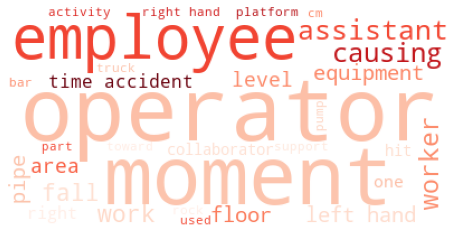

In [ ]:
print('Word Cloud of Description')
ML_Data['Description'] = ML_Data['Description'].fillna('')
Countries_Description = ' '.join(ML_Data.loc[ML_Data['Potential Accident Level'] == 'IV', 'Description'])
plot_wordcloud(Countries_Description, 'Reds')

Word Cloud of Description


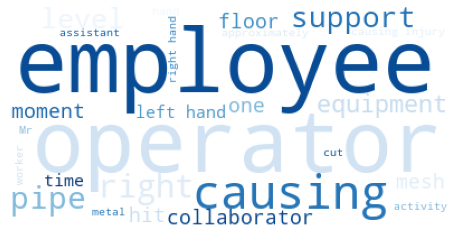

In [ ]:
print('Word Cloud of Description')
ML_Data['Description'] = ML_Data['Description'].fillna('')
Countries_Description = ' '.join(ML_Data.loc[ML_Data['Potential Accident Level'] == 'III', 'Description'])
plot_wordcloud(Countries_Description, 'Blues')

Word Cloud of Description


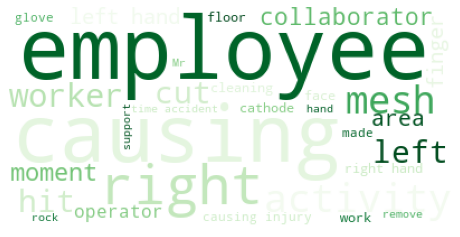

In [ ]:
print('Word Cloud of Description')
ML_Data['Description'] = ML_Data['Description'].fillna('')
Countries_Description = ' '.join(ML_Data.loc[ML_Data['Potential Accident Level'] == 'II', 'Description'])
plot_wordcloud(Countries_Description, 'Greens')

#### Value counts for column

In [ ]:
print(ML_Data.Countries.value_counts())
print(ML_Data.Local.value_counts())
print(ML_Data['Industry Sector'].value_counts())
print(ML_Data['Accident Level'].value_counts())
print(ML_Data['Potential Accident Level'].value_counts())
print(ML_Data.Genre.value_counts())
print(ML_Data['Employee or Third Party'].value_counts())
print(ML_Data['Critical Risk'].value_counts())

Country_01    248
Country_02    129
Country_03     41
Name: Countries, dtype: int64
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_11     2
Local_09     2
Name: Local, dtype: int64
Mining    237
Metals    134
Others     47
Name: Industry Sector, dtype: int64
I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: Potential Accident Level, dtype: int64
Male      396
Female     22
Name: Genre, dtype: int64
Third Party             185
Employee                178
Third Party (Remote)     55
Name: Employee or Third Party, dtype: int64
Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Proj

#### Replace structure

In [ ]:
ML_Data.columns.values

array(['Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'], dtype=object)

In [ ]:
replaceStruct = {
                "Countries":                   {"Country_01": 1, "Country_02": 2, "Country_03":3 },
                 
                "Local":                       {"Local_01": 1, "Local_02": 2, "Local_03": 3, "Local_04": 4, "Local_05": 5, 
                                                "Local_06": 6, "Local_07":7, "Local_08":8, "Local_09":9, "Local_10": 10, 
                                                "Local_11": 11, "Local_12": 12 },
                
                "Industry Sector":             {"Mining": 1, "Metals": 2, "Others": 3 },
                
                "Accident Level":              {"I": 1, "II": 2,"III": 3, "IV": 4, "V": 5 },
                
                "Potential Accident Level":    {"I": 1,"II": 2,"III": 3,"IV": 4,"V": 5,"VI": 6 },
                 
                "Genre":                       {"Male": 1, "Female": 2 },
                
                "Employee or Third Party":     {"Employee": 1, "Third Party": 2, "Third Party (Remote)": 3 },
                 
                "Critical Risk":               {"Others": 1, "Pressed": 2, "Manual Tools": 3, "Chemical substances": 4, "Cut": 5, 
                                                "Projection": 6, "Venomous Animals": 7, "Bees": 8, "Fall": 9, "Vehicles and Mobile Equipment": 10, 
                                                "Pressurized Systems": 11, "remains of choco": 12, "Fall prevention (same level)": 13, 
                                                "Fall prevention": 14,
                                                "Suspended Loads": 15, "Power lock": 16, "Liquid Metal": 17, 
                                                "Pressurized Systems / Chemical Substances": 18, 
                                                "Blocking and isolation of energies": 19, "Electrical Shock": 20, "Machine Protection": 21, 
                                                "Individual protection equipment": 22, "Plates": 23, "Projection of fragments": 24, 
                                                "Confined space": 25,
                                                "Electrical installation": 26, "Projection/Burning": 27, "Poll": 28, "Projection/Manual Tools": 29, 
                                                "Burn": 30, "\nNot applicable": 31, "Traffic": 32, "Projection/Choco": 33 },
  
                    }

In [ ]:
ML_Data=ML_Data.replace(replaceStruct)
# ML_Data=pd.get_dummies(ML_Data, columns=oneHotCols)
ML_Data.head(10)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,1,1,1,1,4,1,2,2,While removing the drill rod of the Jumbo 08 f...
1,2,2,1,1,4,1,1,11,During the activation of a sodium sulphide pum...
2,1,3,1,1,3,1,3,3,In the sub-station MILPO located at level +170...
3,1,4,1,1,1,1,2,1,Being 9:45 am. approximately in the Nv. 1880 C...
4,1,4,1,4,4,1,2,1,Approximately at 11:45 a.m. in circumstances t...
5,2,5,2,1,3,1,3,11,During the unloading operation of the ustulado...
6,2,5,2,1,3,1,1,13,The collaborator reports that he was on street...
7,1,4,1,1,3,1,2,2,"At approximately 04:50 p.m., when the mechanic..."
8,2,2,1,1,4,1,3,1,Employee was sitting in the resting area at le...
9,1,6,2,1,2,1,2,4,At the moment the forklift operator went to ma...


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# #
# # Instantiate LabelEncoder
# #
# le = LabelEncoder()

In [ ]:
# ML_Data_Test=ML_Data.copy()

In [ ]:
# ML_Data_Test=ML_Data.loc[:, ML_Data.columns != 'Description']

In [ ]:
# ML_Data_Test.head()

In [ ]:
# cols = ['Countries', 'Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level', 'Genre', 'Employee or Third Party', 'Critical Risk' ]
# #
# # Encode labels of multiple columns at once
# #
# ML_Data[cols] = ML_Data[cols].apply(LabelEncoder().fit_transform)
# #
# # Print head
# #
# ML_Data.head()

In [ ]:
# merge_data['Class'] = le.fit_transform(merge_data['Class'])

In [ ]:
# ML_Data_Test=ML_Data.loc[:, ML_Data.columns != 'Description']

In [ ]:
ML_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Countries                 418 non-null    int64 
 1   Local                     418 non-null    int64 
 2   Industry Sector           418 non-null    int64 
 3   Accident Level            418 non-null    int64 
 4   Potential Accident Level  418 non-null    int64 
 5   Genre                     418 non-null    int64 
 6   Employee or Third Party   418 non-null    int64 
 7   Critical Risk             418 non-null    int64 
 8   Description               418 non-null    object
dtypes: int64(8), object(1)
memory usage: 32.7+ KB


In [ ]:
Milestone_1_Data = ML_Data.copy()

In [ ]:
Milestone_1_Data.to_csv('Milestone_1_Data.csv')

Milestone-1 Data pre-processing done
Save the file after Data Pre-Processing

#### NLP Pre Processing

In [ ]:
ML_Data=pd.read_csv('Milestone_1_Data.csv')

In [ ]:
ML_Data.head(3)

,Unnamed: 0,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,1,1,1,1,4,1,2,2,While removing the drill rod of the Jumbo 08 f...
1,1,2,2,1,1,4,1,1,11,During the activation of a sodium sulphide pum...
2,2,1,3,1,1,3,1,3,3,In the sub-station MILPO located at level +170...


In [ ]:
ML_Data=ML_Data.drop(columns=['Unnamed: 0'])

In [ ]:
ML_Data.head(3)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,1,1,1,1,4,1,2,2,While removing the drill rod of the Jumbo 08 f...
1,2,2,1,1,4,1,1,11,During the activation of a sodium sulphide pum...
2,1,3,1,1,3,1,3,3,In the sub-station MILPO located at level +170...


In [ ]:
ML_Data['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

In [ ]:
# #Checking length of the Description
# ML_Data['length'] = ML_Data['Description'].apply(len)
# ML_Data.head()

In [ ]:
# #Checking distribution of length

# %matplotlib inline
# ML_Data['length'].plot(bins=50, kind='hist')

In [ ]:
# #Computing word count for each Description
# #lambda function is used to comput the count. It take a string as an input and splits it basis " " and checks the length of the string
# ML_Data['word_count'] = ML_Data['Description'].apply(lambda x: len(str(x).split(" ")))
# ML_Data[['Description','length','word_count']].head()

removing stopwords,remove punctuation, converting them into tokens etc.

In [ ]:
# Converting wrds into lower case format
ML_Data['Description'] = ML_Data['Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
ML_Data['Description'].head()

0    while removing the drill rod of the jumbo 08 f...
1    during the activation of a sodium sulphide pum...
2    in the sub-station milpo located at level +170...
3    being 9:45 am. approximately in the nv. 1880 c...
4    approximately at 11:45 a.m. in circumstances t...
Name: Description, dtype: object

In [ ]:
#Removing punctuations
ML_Data['Description'] = ML_Data['Description'].str.replace('[^\w\s]','')
ML_Data['Description'].head()

0    while removing the drill rod of the jumbo 08 f...
1    during the activation of a sodium sulphide pum...
2    in the substation milpo located at level 170 w...
3    being 945 am approximately in the nv 1880 cx69...
4    approximately at 1145 am in circumstances that...
Name: Description, dtype: object

In [ ]:
import string
import re
import os
import nltk

In [ ]:
def clean_str(text):
    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', (text))
    #remove numbers
    text = re.sub(r'\d+', '', (text))
    # remove old style rewrite text "RT" 
    text = re.sub(r'^RT[\s]+', '', (text))  
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', (text))  
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', (text))    
    #Removing punctuations     
    text = re.sub(r'[^\w\s]','', (text))   
    #Removing multiple spaces between words
    text = re.sub(r' +', ' ', (text))
    return text

In [ ]:
ML_Data["Description"] = ML_Data["Description"].apply(clean_str)
ML_Data.head(3)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,1,1,1,1,4,1,2,2,while removing the drill rod of the jumbo for ...
1,2,2,1,1,4,1,1,11,during the activation of a sodium sulphide pum...
2,1,3,1,1,3,1,3,3,in the substation milpo located at level when ...


In [ ]:
#Checking frequency of words in the entire Description column and fetching top 10 frequencies
freq = pd.Series(' '.join(ML_Data['Description']).split()).value_counts()[:10]
freq

the     4258
of      1491
to       663
and      592
in       535
a        505
was      427
at       344
on       295
that     286
dtype: int64

In [ ]:
#REmoving the above top 10 words
freq = list(freq.index)
ML_Data['Description'] = ML_Data['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
ML_Data['Description'].head()

0    while removing drill rod jumbo for maintenance...
1    during activation sodium sulphide pump piping ...
2    substation milpo located level when collaborat...
3    being am approximately nv cx ob personnel begi...
4    approximately am circumstances mechanics antho...
Name: Description, dtype: object

In [ ]:
##Checking frequency of words in the entire sms column and fetching the last 10 frequencies
freq = pd.Series(' '.join(ML_Data['Description']).split()).value_counts()[-10:]
freq

happens        1
segment        1
prong          1
environment    1
descended      1
december       1
burst          1
toecap         1
seatbelt       1
pedal          1
dtype: int64

In [ ]:
#Removing the rarely used words
freq = list(freq.index)
ML_Data['Description'] = ML_Data['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
ML_Data['Description'].head()

0    while removing drill rod jumbo for maintenance...
1    during activation sodium sulphide pump piping ...
2    substation milpo located level when collaborat...
3    being am approximately nv cx ob personnel begi...
4    approximately am circumstances mechanics antho...
Name: Description, dtype: object

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_text(text):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  

In [ ]:
ML_Data['Description'] = ML_Data['Description'].apply(lemmatize_text)

In [ ]:
ML_Data.head(3)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,1,1,1,1,4,1,2,2,while removing drill rod jumbo for maintenance...
1,2,2,1,1,4,1,1,11,during activation sodium sulphide pump piping ...
2,1,3,1,1,3,1,3,3,substation milpo located level when collaborat...


In [ ]:
ML_Data_Text_length=ML_Data.copy()

In [ ]:
print('--'*40); print('Get the length of each line, find the maximum length and print the maximum length line'); 
# Get length of each line
ML_Data_Text_length['line_length'] = ML_Data_Text_length['Description'].str.len()

print('Minimum line length: {}'.format(ML_Data_Text_length['line_length'].min()))
print('Maximum line length: {}'.format(ML_Data_Text_length['line_length'].max()))
print('Line with maximum length: {}'.format(ML_Data_Text_length[ML_Data_Text_length['line_length'] == ML_Data_Text_length['line_length'].max()]['Description'].values[0]))

--------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Minimum line length: 61
Maximum line length: 761
Line with maximum length: when performing sleeve removal maneuver when hole meter deep general da silva pressed only one side locking nut rod which together with jack hold entire weight rod maneuver a locking procedure not effective weight rod only secured by steel wire rope probe winch moment driller pedro released brake winch inefficacy locking done only one side chestnut without aid monkey caused sliding rod auxiliary prepared for manual unlocking rod holding faucet key firmly against probe tower a composition shifted a stem slid his hand were shifted downward causing his left hand strike against base probe tower structure causing cut th th quirodactyl employee taken hospital where he went through medical care wound sutured with stitch same removed for day from his acti

In [ ]:
ML_Data_Text_length.head(3)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,line_length
0,1,1,1,1,4,1,2,2,while removing drill rod jumbo for maintenance...,332
1,2,2,1,1,4,1,1,11,during activation sodium sulphide pump piping ...,215
2,1,3,1,1,3,1,3,3,substation milpo located level when collaborat...,226


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# word_tokenizer = word_tokenize()
nltk.download('stopwords')
stopwords_english = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.word_tokenize(ML_Data['Description'][0])

['while',
 'removing',
 'drill',
 'rod',
 'jumbo',
 'for',
 'maintenance',
 'supervisor',
 'proceeds',
 'loosen',
 'support',
 'intermediate',
 'centralizer',
 'facilitate',
 'removal',
 'seeing',
 'this',
 'mechanic',
 'support',
 'one',
 'end',
 'drill',
 'equipment',
 'pull',
 'with',
 'both',
 'hand',
 'bar',
 'accelerate',
 'removal',
 'from',
 'this',
 'this',
 'moment',
 'bar',
 'slide',
 'from',
 'it',
 'point',
 'support',
 'tightens',
 'finger',
 'mechanic',
 'between',
 'drilling',
 'bar',
 'beam',
 'jumbo']

In [ ]:
# df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']), axis=1)

In [ ]:
def process_word(word):
    # tokenize 
    # tokenizer = nltk.word_tokenize()
    word_tokens = nltk.word_tokenize(word)
    ### START CODE HERE ###
    words_clean = []
    for word in word_tokens:
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            words_clean.append(word)
    ### END CODE HERE ###
    return words_clean

In [ ]:
ML_Data['Description'][0]

'while removing drill rod jumbo for maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing this mechanic support one end drill equipment pull with both hand bar accelerate removal from this this moment bar slide from it point support tightens finger mechanic between drilling bar beam jumbo'

In [ ]:
process = process_word(ML_Data['Description'][0])
process

['removing',
 'drill',
 'rod',
 'jumbo',
 'maintenance',
 'supervisor',
 'proceeds',
 'loosen',
 'support',
 'intermediate',
 'centralizer',
 'facilitate',
 'removal',
 'seeing',
 'mechanic',
 'support',
 'one',
 'end',
 'drill',
 'equipment',
 'pull',
 'hand',
 'bar',
 'accelerate',
 'removal',
 'moment',
 'bar',
 'slide',
 'point',
 'support',
 'tightens',
 'finger',
 'mechanic',
 'drilling',
 'bar',
 'beam',
 'jumbo']

In [ ]:
all_word = []
for row in ML_Data['Description']:
    for word in process_word(row):
        all_word.append(word)

In [ ]:
len(all_word)

13719

In [ ]:
import os
path = os.getcwd()
path

'/content/drive/My Drive/Capstone Project'

Using GloVe Embedding of 50 dimension

In [ ]:
import os
import gensim
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors # Gensim contains word2vec models and processing tools


glove_file = datapath(path + '/glove.6B.50d.txt') # This is a GloVe model
tmp_file = get_tmpfile(path + '/word2vec.glove.6B.50d.txt')

from gensim.scripts.glove2word2vec import glove2word2vec
_ =  glove2word2vec(glove_file, tmp_file)  # Converting the GloVe file into a Word2Vec file
model = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
# Check out what the embedding looks like
wordEmbed = model['cat']
print(wordEmbed.shape)
print(wordEmbed)

(50,)
[ 0.45281  -0.50108  -0.53714  -0.015697  0.22191   0.54602  -0.67301
 -0.6891    0.63493  -0.19726   0.33685   0.7735    0.90094   0.38488
  0.38367   0.2657   -0.08057   0.61089  -1.2894   -0.22313  -0.61578
  0.21697   0.35614   0.44499   0.60885  -1.1633   -1.1579    0.36118
  0.10466  -0.78325   1.4352    0.18629  -0.26112   0.83275  -0.23123
  0.32481   0.14485  -0.44552   0.33497  -0.95946  -0.097479  0.48138
 -0.43352   0.69455   0.91043  -0.28173   0.41637  -1.2609    0.71278
  0.23782 ]


In [ ]:
# Converting All Description into GloVe embeddings
data_list = list()
for row in ML_Data['Description']:
    sentence = np.zeros(50)
    count = 0
    for word in process_word(row):
        try:
            sentence += model[word]
            count += 1
        except KeyError:
            continue
    data_list.append(sentence / count)

In [ ]:
#taking GloVe embeddings
b = np.array(data_list)

In [ ]:
G_Emb = pd.DataFrame(b)

In [ ]:
G_Emb.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.039469,-0.035376,0.212115,-0.065389,-0.018540,0.182410,-0.047107,0.061246,0.290126,-0.098164,0.037737,0.089340,-0.101548,0.378833,-0.188183,0.228409,-0.001630,0.006550,-0.066516,-0.522839,0.360366,-0.127629,-0.237946,-0.266074,0.060091,-1.073825,0.141071,0.117913,0.401691,-0.081999,2.104890,0.033158,-0.407612,0.072592,0.074960,0.154447,0.207208,0.071274,0.118896,-0.008447,-0.107813,0.031301,-0.038654,0.171177,0.048133,-0.218537,0.262105,0.037239,0.013982,0.008777
1,0.502943,0.201582,0.292007,-0.249757,-0.095729,0.444360,0.188112,0.055487,0.142027,0.317338,0.234138,0.028111,0.330394,0.096705,-0.059959,0.325110,0.046511,0.216163,-0.117518,-0.312947,0.399075,-0.121341,0.335932,0.012854,-0.053659,-0.607936,0.122202,0.251455,0.253166,0.061588,1.907031,-0.158384,-0.199789,-0.144829,0.309985,0.233071,0.460387,0.050523,0.441874,0.093196,0.231286,0.022348,-0.043114,-0.064013,0.134352,0.008991,0.010810,-0.088406,0.233532,-0.061718
2,0.075379,-0.000722,0.195377,-0.132698,0.127465,0.173214,-0.278530,0.137710,0.240831,-0.066602,0.131724,-0.155582,-0.368934,0.203241,-0.149852,0.013283,0.128996,-0.026839,-0.361723,-0.254784,-0.149548,-0.118455,-0.164711,-0.134572,-0.043751,-0.943736,-0.085053,0.342193,0.396658,-0.206279,2.231762,-0.213892,0.340991,-0.045648,0.066643,0.405501,0.143623,0.237863,0.375736,-0.021621,-0.096389,0.053867,-0.075208,0.076540,0.159041,-0.171824,0.235900,-0.298340,-0.041256,-0.222112
3,0.125702,-0.055932,0.221476,-0.007288,0.177364,0.089631,0.054621,0.128408,0.049413,-0.263200,0.127909,-0.015841,-0.404629,0.340068,-0.045717,0.151407,0.038364,-0.026345,-0.285138,-0.449210,0.001696,-0.092557,0.000968,-0.009740,0.113268,-0.790301,0.145702,0.119879,0.141106,-0.046297,1.819078,0.093445,-0.108530,-0.033102,0.007419,0.140639,0.211046,0.095465,-0.037926,0.043347,0.005248,0.060080,-0.118328,0.157279,-0.022586,-0.149192,0.271330,-0.110782,-0.081063,-0.139170
4,0.039382,0.154635,0.385357,-0.099722,0.180216,0.368588,-0.027330,-0.073033,0.146686,-0.190321,0.184702,-0.173976,-0.285707,0.031800,0.106148,0.131195,-0.031154,0.063412,-0.384177,-0.405378,-0.039425,-0.087325,0.054078,-0.151408,0.008842,-0.856297,0.147521,0.150775,0.164291,0.077405,2.116062,-0.046181,0.079364,0.055379,0.086186,0.026375,0.215432,0.163885,0.289426,0.017070,-0.093146,0.127253,-0.001618,0.067766,0.008065,-0.295977,0.201136,-0.341059,-0.058426,0.039553


In [ ]:
ML_Model_Data = pd.concat([ML_Data,G_Emb],axis=1)

In [ ]:
ML_Model_Data.head(3)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,1,1,1,4,1,2,2,while removing drill rod jumbo for maintenance...,0.039469,-0.035376,0.212115,-0.065389,-0.018540,0.182410,-0.047107,0.061246,0.290126,-0.098164,0.037737,0.089340,-0.101548,0.378833,-0.188183,0.228409,-0.001630,0.006550,-0.066516,-0.522839,0.360366,-0.127629,-0.237946,-0.266074,0.060091,-1.073825,0.141071,0.117913,0.401691,-0.081999,2.104890,0.033158,-0.407612,0.072592,0.074960,0.154447,0.207208,0.071274,0.118896,-0.008447,-0.107813,0.031301,-0.038654,0.171177,0.048133,-0.218537,0.262105,0.037239,0.013982,0.008777
1,2,2,1,1,4,1,1,11,during activation sodium sulphide pump piping ...,0.502943,0.201582,0.292007,-0.249757,-0.095729,0.444360,0.188112,0.055487,0.142027,0.317338,0.234138,0.028111,0.330394,0.096705,-0.059959,0.325110,0.046511,0.216163,-0.117518,-0.312947,0.399075,-0.121341,0.335932,0.012854,-0.053659,-0.607936,0.122202,0.251455,0.253166,0.061588,1.907031,-0.158384,-0.199789,-0.144829,0.309985,0.233071,0.460387,0.050523,0.441874,0.093196,0.231286,0.022348,-0.043114,-0.064013,0.134352,0.008991,0.010810,-0.088406,0.233532,-0.061718
2,1,3,1,1,3,1,3,3,substation milpo located level when collaborat...,0.075379,-0.000722,0.195377,-0.132698,0.127465,0.173214,-0.278530,0.137710,0.240831,-0.066602,0.131724,-0.155582,-0.368934,0.203241,-0.149852,0.013283,0.128996,-0.026839,-0.361723,-0.254784,-0.149548,-0.118455,-0.164711,-0.134572,-0.043751,-0.943736,-0.085053,0.342193,0.396658,-0.206279,2.231762,-0.213892,0.340991,-0.045648,0.066643,0.405501,0.143623,0.237863,0.375736,-0.021621,-0.096389,0.053867,-0.075208,0.076540,0.159041,-0.171824,0.235900,-0.298340,-0.041256,-0.222112


In [ ]:
ML_Model_Data.drop(['Description'],axis=1,inplace=True)

In [ ]:
ML_Model_Data.head(3)

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,1,1,1,4,1,2,2,0.039469,-0.035376,0.212115,-0.065389,-0.018540,0.182410,-0.047107,0.061246,0.290126,-0.098164,0.037737,0.089340,-0.101548,0.378833,-0.188183,0.228409,-0.001630,0.006550,-0.066516,-0.522839,0.360366,-0.127629,-0.237946,-0.266074,0.060091,-1.073825,0.141071,0.117913,0.401691,-0.081999,2.104890,0.033158,-0.407612,0.072592,0.074960,0.154447,0.207208,0.071274,0.118896,-0.008447,-0.107813,0.031301,-0.038654,0.171177,0.048133,-0.218537,0.262105,0.037239,0.013982,0.008777
1,2,2,1,1,4,1,1,11,0.502943,0.201582,0.292007,-0.249757,-0.095729,0.444360,0.188112,0.055487,0.142027,0.317338,0.234138,0.028111,0.330394,0.096705,-0.059959,0.325110,0.046511,0.216163,-0.117518,-0.312947,0.399075,-0.121341,0.335932,0.012854,-0.053659,-0.607936,0.122202,0.251455,0.253166,0.061588,1.907031,-0.158384,-0.199789,-0.144829,0.309985,0.233071,0.460387,0.050523,0.441874,0.093196,0.231286,0.022348,-0.043114,-0.064013,0.134352,0.008991,0.010810,-0.088406,0.233532,-0.061718
2,1,3,1,1,3,1,3,3,0.075379,-0.000722,0.195377,-0.132698,0.127465,0.173214,-0.278530,0.137710,0.240831,-0.066602,0.131724,-0.155582,-0.368934,0.203241,-0.149852,0.013283,0.128996,-0.026839,-0.361723,-0.254784,-0.149548,-0.118455,-0.164711,-0.134572,-0.043751,-0.943736,-0.085053,0.342193,0.396658,-0.206279,2.231762,-0.213892,0.340991,-0.045648,0.066643,0.405501,0.143623,0.237863,0.375736,-0.021621,-0.096389,0.053867,-0.075208,0.076540,0.159041,-0.171824,0.235900,-0.298340,-0.041256,-0.222112


In [ ]:
ML_Model_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Countries                 418 non-null    int64  
 1   Local                     418 non-null    int64  
 2   Industry Sector           418 non-null    int64  
 3   Accident Level            418 non-null    int64  
 4   Potential Accident Level  418 non-null    int64  
 5   Genre                     418 non-null    int64  
 6   Employee or Third Party   418 non-null    int64  
 7   Critical Risk             418 non-null    int64  
 8   0                         418 non-null    float64
 9   1                         418 non-null    float64
 10  2                         418 non-null    float64
 11  3                         418 non-null    float64
 12  4                         418 non-null    float64
 13  5                         418 non-null    float64
 14  6         

In [ ]:
ML_Model_Data.shape

(418, 58)

In [ ]:
ML_Model_Data_Final = ML_Model_Data.copy()

In [ ]:
ML_Model_Data.to_csv('Milestone_2_Data.csv')

In [ ]:
y_data = ML_Model_Data_Final["Potential Accident Level"]
y_data.shape

(418,)

In [ ]:
y_data.value_counts()

4    141
3    106
2     95
1     45
5     30
6      1
Name: Potential Accident Level, dtype: int64

In [ ]:
y_list = list(y_data)
d = y_list.index(6)
d

304

In [ ]:
x_data = ML_Model_Data_Final.copy()

In [ ]:
x_data.drop(['Accident Level','Potential Accident Level'], axis=1, inplace = True)

In [ ]:
x_data.head()

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,1,1,1,2,2,0.039469,-0.035376,0.212115,-0.065389,-0.018540,0.182410,-0.047107,0.061246,0.290126,-0.098164,0.037737,0.089340,-0.101548,0.378833,-0.188183,0.228409,-0.001630,0.006550,-0.066516,-0.522839,0.360366,-0.127629,-0.237946,-0.266074,0.060091,-1.073825,0.141071,0.117913,0.401691,-0.081999,2.104890,0.033158,-0.407612,0.072592,0.074960,0.154447,0.207208,0.071274,0.118896,-0.008447,-0.107813,0.031301,-0.038654,0.171177,0.048133,-0.218537,0.262105,0.037239,0.013982,0.008777
1,2,2,1,1,1,11,0.502943,0.201582,0.292007,-0.249757,-0.095729,0.444360,0.188112,0.055487,0.142027,0.317338,0.234138,0.028111,0.330394,0.096705,-0.059959,0.325110,0.046511,0.216163,-0.117518,-0.312947,0.399075,-0.121341,0.335932,0.012854,-0.053659,-0.607936,0.122202,0.251455,0.253166,0.061588,1.907031,-0.158384,-0.199789,-0.144829,0.309985,0.233071,0.460387,0.050523,0.441874,0.093196,0.231286,0.022348,-0.043114,-0.064013,0.134352,0.008991,0.010810,-0.088406,0.233532,-0.061718
2,1,3,1,1,3,3,0.075379,-0.000722,0.195377,-0.132698,0.127465,0.173214,-0.278530,0.137710,0.240831,-0.066602,0.131724,-0.155582,-0.368934,0.203241,-0.149852,0.013283,0.128996,-0.026839,-0.361723,-0.254784,-0.149548,-0.118455,-0.164711,-0.134572,-0.043751,-0.943736,-0.085053,0.342193,0.396658,-0.206279,2.231762,-0.213892,0.340991,-0.045648,0.066643,0.405501,0.143623,0.237863,0.375736,-0.021621,-0.096389,0.053867,-0.075208,0.076540,0.159041,-0.171824,0.235900,-0.298340,-0.041256,-0.222112
3,1,4,1,1,2,1,0.125702,-0.055932,0.221476,-0.007288,0.177364,0.089631,0.054621,0.128408,0.049413,-0.263200,0.127909,-0.015841,-0.404629,0.340068,-0.045717,0.151407,0.038364,-0.026345,-0.285138,-0.449210,0.001696,-0.092557,0.000968,-0.009740,0.113268,-0.790301,0.145702,0.119879,0.141106,-0.046297,1.819078,0.093445,-0.108530,-0.033102,0.007419,0.140639,0.211046,0.095465,-0.037926,0.043347,0.005248,0.060080,-0.118328,0.157279,-0.022586,-0.149192,0.271330,-0.110782,-0.081063,-0.139170
4,1,4,1,1,2,1,0.039382,0.154635,0.385357,-0.099722,0.180216,0.368588,-0.027330,-0.073033,0.146686,-0.190321,0.184702,-0.173976,-0.285707,0.031800,0.106148,0.131195,-0.031154,0.063412,-0.384177,-0.405378,-0.039425,-0.087325,0.054078,-0.151408,0.008842,-0.856297,0.147521,0.150775,0.164291,0.077405,2.116062,-0.046181,0.079364,0.055379,0.086186,0.026375,0.215432,0.163885,0.289426,0.017070,-0.093146,0.127253,-0.001618,0.067766,0.008065,-0.295977,0.201136,-0.341059,-0.058426,0.039553


#### Decision Tree and Bagging Classification Model

Splitting the data into training and test set of ratio 70:30

In [ ]:
from sklearn.model_selection import train_test_split # import library for this
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3,random_state = 42)

print("x_train :", x_train.shape)
print("x_test :" , x_test.shape)
print("y_train :" , y_train.shape)
print("y_test :" , y_train.shape)

x_train : (292, 56)
x_test : (126, 56)
y_train : (292,)
y_test : (292,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(random_state=1)

In [ ]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.31746031746031744


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# Reducing over fitting (Regularization)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.547945205479452
0.38095238095238093


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.38095238095238093


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


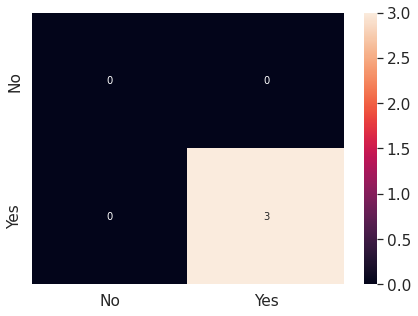

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(x_test , y_test))
y_predict = dTreeR.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.4126984126984127


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


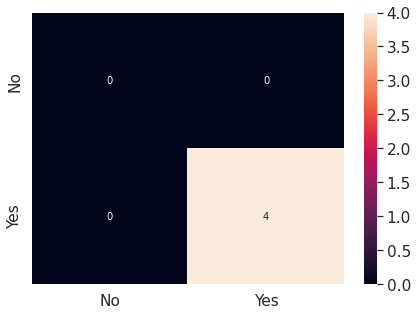

In [ ]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')